In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import pickle
import os
import time
from datetime import datetime, timedelta

# 한글 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 나눔고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import rc
rc('font', family='Malgun Gothic')

from sklearn.metrics import mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_columns', None)

np.set_printoptions(precision=6, suppress=True) 
pd.options.display.float_format = '{:.5f}'.format

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report


import random
random.seed(20231204)

In [2]:
ltv_eda_master_raw0 = pd.read_pickle('C:/Users/kihwanb/Desktop/업무/★프로젝트/ltv/ltv_eda_master_cum_240311_d7.pkl')

In [3]:
# hottime = pd.read_csv('C:/Users/kihwanb/extract/hottime_d6_cum.csv')
# hottime = hottime.rename(columns={'nru_day':'dt_nru'})
# ltv_eda_master_raw1 = pd.merge(ltv_eda_master_raw0.loc[:,~ltv_eda_master_raw0.columns.str.contains('hottime')],hottime, on=['dt_nru','user_key'], how='left')
# ltv_eda_master_raw1['hottime_sales_cum'] = ltv_eda_master_raw1['hottime_sales_cum'].fillna(0)
# ltv_eda_master_raw1.to_pickle('C:/Users/kihwanb/Desktop/업무/★프로젝트/ltv/ltv_eda_master_cum_240311_d7.pkl')

In [4]:
# ltv_eda_master_pu_yn0['dt_nru'] = pd.to_datetime(ltv_eda_master_pu_yn0['dt_nru'])
# ltv_eda_master_pu_yn0 = ltv_eda_master_pu_yn0.loc[:,~ltv_eda_master_pu_yn0.columns.str.contains('_d')]

In [5]:
ltv_eda_master_pu_yn0 = ltv_eda_master_raw0.copy()
ltv_eda_master_pu_yn0['dt_nru'] = pd.to_datetime(ltv_eda_master_pu_yn0['dt_nru'])
#ltv_eda_master_pu_yn0 = ltv_eda_master_pu_yn0[ltv_eda_master_pu_yn0['uu_cum']>0]
#ltv_eda_master_pu_yn0 = ltv_eda_master_pu_yn0.drop(['os_cd'],axis=1)
#,'first_churn_dt', 'first_comeback_dt','os_cd'

In [6]:
ltv_eda_master_pu_yn0['ltv_6_pu_yn'] = 1
ltv_eda_master_pu_yn0['ltv_6_pu_yn'] = np.where(ltv_eda_master_pu_yn0['ltv_6']<=0, 0, ltv_eda_master_pu_yn0['ltv_6_pu_yn'])

ltv_eda_master_pu_yn0['ltv_30_pu_yn'] = 1
ltv_eda_master_pu_yn0['ltv_30_pu_yn'] = np.where(ltv_eda_master_pu_yn0['ltv_30']<=0, 0, ltv_eda_master_pu_yn0['ltv_30_pu_yn'])

ltv_eda_master_pu_yn0['ltv_60_pu_yn'] = 1
ltv_eda_master_pu_yn0['ltv_60_pu_yn'] = np.where(ltv_eda_master_pu_yn0['ltv_60']<=0, 0, ltv_eda_master_pu_yn0['ltv_60_pu_yn'])

ltv_eda_master_pu_yn0['ltv_90_pu_yn'] = 1
ltv_eda_master_pu_yn0['ltv_90_pu_yn'] = np.where(ltv_eda_master_pu_yn0['ltv_90']<=0, 0, ltv_eda_master_pu_yn0['ltv_90_pu_yn'])

ltv_eda_master_pu_yn0['ltv_180_pu_yn'] = 1
ltv_eda_master_pu_yn0['ltv_180_pu_yn'] = np.where(ltv_eda_master_pu_yn0['ltv_180']<=0, 0, ltv_eda_master_pu_yn0['ltv_180_pu_yn'])

In [7]:
test_end_date = '2024-01-28'
test_period = 31
test_start_date = (datetime.strptime(test_end_date, '%Y-%m-%d') - timedelta(days=test_period)).strftime('%Y-%m-%d')

target_ltv = 'ltv_30'
target_pu_yn = target_ltv+'_pu_yn'
last_real_ltv = 'ltv_6'

train_end_date = (datetime.strptime(test_start_date, '%Y-%m-%d') -  timedelta(days=int(target_ltv.split('ltv_')[1]))).strftime('%Y-%m-%d')
train_start_date = '2022-01-01'

print(train_start_date)
print(train_end_date)
print(test_start_date)
print(test_end_date)

2022-01-01
2023-11-28
2023-12-28
2024-01-28


In [8]:
# train_start_date = '2022-01-01'
# train_end_date = '2023-07-30'

# test_start_date = '2023-09-01'
# test_end_date = '2023-10-01'
# target_ltv = 'ltv_30'
# last_real_ltv = 'ltv_6'
# target_pu_yn = target_ltv+'_pu_yn'

In [9]:
train_start_date2 = datetime.strptime(train_start_date, '%Y-%m-%d')
train_end_date2 = datetime.strptime(train_end_date, '%Y-%m-%d')

train_period2 = 360

check_thre_dt = (train_end_date2 - timedelta(days=train_period2)).strftime('%Y-%m-%d')


ltv_eda_master_pu_yn_model = ltv_eda_master_pu_yn0[(ltv_eda_master_pu_yn0['dt_nru']>=check_thre_dt)&(ltv_eda_master_pu_yn0['dt_nru']<=train_end_date)]


In [10]:
check_cols = ltv_eda_master_pu_yn_model.loc[:,ltv_eda_master_pu_yn_model.columns.str.contains('cum')].columns
check_cols = [elements for elements in check_cols if 'au' not in elements]
check_cols = [elements for elements in check_cols if 'uu' not in elements]
check_cols = [elements for elements in check_cols if 'sales' not in elements] 

def ountlier_check_column(df):
    outlier_column_list = []
    for i in check_cols:
        if df[i].quantile(0.99) > 20:        
            outlier_column_list.append(i)
        else:
             pass
    return outlier_column_list

def ountlier_check_index(df):
    outlier_index_list = []
    for i in ountlier_check_column(df):
        if df[i].quantile(0.99) > 20:     
            outlier_index_list = outlier_index_list+(df[df[i]>=df[i].quantile(0.99)].index.tolist())
        else:
             pass
    return list(set(outlier_index_list))

In [11]:
ltv_eda_master_pu_yn_no_outlier = ltv_eda_master_pu_yn_model.drop(ountlier_check_index(ltv_eda_master_pu_yn_model))

In [12]:
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
ltv_eda_master_pu_yn_features = ltv_eda_master_pu_yn_no_outlier.select_dtypes(include=numerics_types)
ltv_eda_master_pu_yn_features = ltv_eda_master_pu_yn_features.loc[:,~ltv_eda_master_pu_yn_features.columns.str.startswith('ltv')]
ltv_eda_master_pu_yn_features =                                 ltv_eda_master_pu_yn_features.loc[:,~ltv_eda_master_pu_yn_features.columns.str.contains('sales_cum')]

ltv_eda_master_pu_yn_features =                                 ltv_eda_master_pu_yn_features.loc[:,~ltv_eda_master_pu_yn_features.columns.str.contains('_3d_sales')]
ltv_eda_master_pu_yn_features =                                 ltv_eda_master_pu_yn_features.loc[:,~ltv_eda_master_pu_yn_features.columns.str.contains('purchase')]



ltv_eda_master_pu_yn_target = ltv_eda_master_pu_yn_no_outlier[target_pu_yn].to_frame()

In [13]:
ltv_eda_master_pu_yn_features_fin = ltv_eda_master_pu_yn_features.copy()

In [14]:
for i in ltv_eda_master_pu_yn_features_fin.columns:
    ltv_eda_master_pu_yn_features_fin[i] = np.log1p(ltv_eda_master_pu_yn_features_fin[i])

In [15]:
from sklearn.model_selection import train_test_split


X_data = ltv_eda_master_pu_yn_features_fin
y_target = ltv_eda_master_pu_yn_target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [16]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()
stand_scaler.fit(X_train)

X_train_scaled = stand_scaler.transform(X_train)
X_test_scaled = stand_scaler.transform(X_test)

In [17]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_over, y_train_over = adasyn.fit_resample(X_train_scaled, y_train)
print("ADASYN 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('ADASYN 적용 전 값의 분포 :\n',y_train.groupby(target_pu_yn).value_counts())
print('')
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('ADASYN 적용 후 값의 분포 :\n',y_train_over.groupby(target_pu_yn).value_counts())

ADASYN 적용 전 학습용 피처/레이블 데이터 세트 :  (2763037, 65) (2763037, 1)
ADASYN 적용 전 값의 분포 :
 ltv_30_pu_yn
0    2745168
1      17869
dtype: int64

ADASYN 적용 후 학습용 피처/레이블 데이터 세트 : (5488533, 65) (5488533, 1)
ADASYN 적용 후 값의 분포 :
 ltv_30_pu_yn
0    2745168
1    2743365
dtype: int64


In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.metrics import classification_report_imbalanced
## 증식한 데이터로 LGBM 적용
start_time = time.time()

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 64,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state':156
}


lgbm_clf = LGBMClassifier(n_estimators=1000,n_jobs=-1,**params)

lgbm_clf.fit(X_train_over, y_train_over)

pickle.dump(lgbm_clf, open('C:/Users/kihwanb/Desktop/업무/★프로젝트/LTV/모델/'+'d6_'+target_ltv+'_'+train_end_date+'_'+'LGBMClassifier.pkl', 'wb'))

lgbm_preds = lgbm_clf.predict(X_test_scaled)

print('수행 시간: {:.1f}초'.format(time.time() - start_time))


from imblearn.metrics import classification_report_imbalanced

label = ['non-paid', 'paid'] 
print(classification_report_imbalanced(y_test, lgbm_preds, target_names=label))

precision, recall, _ = precision_recall_curve(y_test, lgbm_clf.predict_proba(X_test_scaled)[:, 1])
auc_pr = auc(recall, precision)
roc_auc = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test_scaled)[:, 1])

print(f'AUC-PR: {auc_pr:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

수행 시간: 293.9초
                   pre       rec       spe        f1       geo       iba       sup

   non-paid       1.00      1.00      0.61      1.00      0.78      0.64   1176506
       paid       0.84      0.61      1.00      0.71      0.78      0.59      7654

avg / total       1.00      1.00      0.62      1.00      0.78      0.64   1184160

AUC-PR: 0.6541
ROC-AUC: 0.8763


In [19]:
ltv_eda_master_pu_yn_test = ltv_eda_master_pu_yn0[(ltv_eda_master_pu_yn0['dt_nru']>=test_start_date)&(ltv_eda_master_pu_yn0['dt_nru']<=test_end_date)]
#ltv_eda_master_pu_yn_test = ltv_eda_master_pu_yn_test0.loc[:,~ltv_eda_master_pu_yn_test0.columns.str.contains('_d')]

In [20]:
# 각 유저별로 모든 컬럼 또는 45개 이상의 컬럼 값이 모두 0인지 확인
check_cols = ltv_eda_master_pu_yn_features.loc[:,~ltv_eda_master_pu_yn_features.columns.str.contains('ltv')].columns.tolist()
check_cols = [elements for elements in check_cols if 'sales' not in elements]
check_cols = [elements for elements in check_cols if 'os_cd' not in elements]

zeros_condition = (ltv_eda_master_pu_yn_test[check_cols] == 0).sum(axis=1) >= int(len(check_cols)*0.4)  

# 55개 컬럼 중 40% 이상의 컬럼에서 값이 모두 0인지

zero_value_users = ltv_eda_master_pu_yn_test[zeros_condition].index.tolist()

print(len(zero_value_users))
print(len(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(zero_value_users))&(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==1)]))
print(len(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(zero_value_users))&(ltv_eda_master_pu_yn_test[target_pu_yn]==1)]))

221732
834
995


In [21]:
train_start_date2 = datetime.strptime(train_start_date, '%Y-%m-%d')
train_end_date2 = datetime.strptime(train_end_date, '%Y-%m-%d')

train_period = 30

check_thre_dt = (train_end_date2 - timedelta(days=train_period)).strftime('%Y-%m-%d')

threshold_list = np.arange(0.2, 0.05, -0.01)
for i in threshold_list:
    top_users_per_column = []

    top_thresholds = ltv_eda_master_pu_yn_model[(ltv_eda_master_pu_yn_model['dt_nru']>=check_thre_dt)&(ltv_eda_master_pu_yn_model['dt_nru']<=train_end_date)][check_cols].quantile(1-i)

    for column in check_cols:
        top_condition = ltv_eda_master_pu_yn_test[column] >= top_thresholds[column]    
        top_users_per_column.append(ltv_eda_master_pu_yn_test[top_condition].index.tolist())

    top_users = set(top_users_per_column[0]).intersection(*top_users_per_column[1:])
    top_users = set(top_users)
    if len(top_users)<1000:
        break
    

print(len(top_users))
print(len(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(top_users)) & (ltv_eda_master_pu_yn_test['ltv_6_pu_yn'] == 1)]))
print(len(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(top_users)) & (ltv_eda_master_pu_yn_test[target_pu_yn] == 1)]))

4041
958
1139


In [22]:
ltv_eda_master_test_pu_y = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==1].index)]

In [23]:
ltv_eda_master_test_pu_y1 = ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(top_users))]

In [24]:
# ltv_eda_master_test_pu_y2 = ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(top_users2))]

In [25]:
# ltv_eda_master_test_pu_y2 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_30_pu_yn']==1)&(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['5g_hero_enhance_exp_cum']>700000)&(ltv_eda_master_pu_yn_test['ad_cnt_cum']>10)&(ltv_eda_master_pu_yn_test['essence_get_amt_cum']>100)&(ltv_eda_master_pu_yn_test['autom_clear_cnt_cum']>15)&(ltv_eda_master_pu_yn_test['hun_clear_cnt_cum']>80)].index)]

In [26]:
ltv_eda_master_test_pu_n = ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test.index.isin(zero_value_users))]

In [27]:
ltv_eda_master_test_pu_n1 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['last_3d_au_yn_cum']==0)].index)]

In [28]:
ltv_eda_master_test_pu_n2 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['access_cnt_cum']<50)].index)]

In [29]:
ltv_eda_master_test_pu_n3 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['total_clear_cnt_cum']<50)].index)]

In [30]:
ltv_eda_master_test_pu_n4 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['crystal_get_amt_cum']<300)].index)]

In [31]:
ltv_eda_master_test_pu_n5 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['gold_get_amt_cum']<1500000)].index)]

In [32]:
ltv_eda_master_test_pu_n6 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['arti_enhance_exp_cum']==0)&(ltv_eda_master_pu_yn_test['equip_enhance_exp_cum']==0)&(ltv_eda_master_pu_yn_test['hero_enhance_exp_cum']==0)&(ltv_eda_master_pu_yn_test['ticketrare_use_amt_cum']==0)&(ltv_eda_master_pu_yn_test['gold_use_amt_cum']<100000)].index)]

In [33]:
ltv_eda_master_test_pu_n7 = ltv_eda_master_pu_yn_test[ltv_eda_master_pu_yn_test.index.isin(ltv_eda_master_pu_yn_test[(ltv_eda_master_pu_yn_test['ltv_6_pu_yn']==0)&(ltv_eda_master_pu_yn_test['arti_enhance_exp_cum']==0)&(ltv_eda_master_pu_yn_test['equip_enhance_exp_cum']==0)&(ltv_eda_master_pu_yn_test['hero_enhance_exp_cum']==0)&(ltv_eda_master_pu_yn_test['ticketrare_use_amt_cum']==0)&(ltv_eda_master_pu_yn_test['gold_get_amt_cum']<50000)&(ltv_eda_master_pu_yn_test['max_adv_stage_cum']<20)].index)]

In [34]:
fixed_user_list = list(set(list(ltv_eda_master_test_pu_y['user_key'])+list(ltv_eda_master_test_pu_y1['user_key'])+list(ltv_eda_master_test_pu_n['user_key'])+list(ltv_eda_master_test_pu_n1['user_key'])+list(ltv_eda_master_test_pu_n2['user_key'])+list(ltv_eda_master_test_pu_n3['user_key'])+list(ltv_eda_master_test_pu_n4['user_key'])+list(ltv_eda_master_test_pu_n5['user_key'])+list(ltv_eda_master_test_pu_n6['user_key'])+list(ltv_eda_master_test_pu_n7['user_key'])))

In [35]:
print(len(ltv_eda_master_test_pu_y['user_key']))
print(len(ltv_eda_master_test_pu_y1['user_key']))
print(len(set(list(ltv_eda_master_test_pu_y['user_key'])+list(ltv_eda_master_test_pu_y1['user_key']))))
print(len(ltv_eda_master_test_pu_n['user_key']))
print(len(ltv_eda_master_test_pu_n1['user_key']))
print(len(ltv_eda_master_test_pu_n2['user_key']))
print(len(ltv_eda_master_test_pu_n3['user_key']))
print(len(ltv_eda_master_test_pu_n4['user_key']))
print(len(ltv_eda_master_test_pu_n5['user_key']))
print(len(ltv_eda_master_test_pu_n6['user_key']))
print(len(ltv_eda_master_test_pu_n7['user_key']))
print(len(fixed_user_list))

3555
4041
6638
221732
214347
209811
218048
139174
173591
145119
120645
231212


In [36]:
ltv_eda_master_pu_yn_need = ltv_eda_master_pu_yn_test[~ltv_eda_master_pu_yn_test['user_key'].isin(fixed_user_list)]

In [37]:
len(ltv_eda_master_pu_yn_need)

9493

In [38]:
ltv_eda_master_pu_yn_need_features = ltv_eda_master_pu_yn_need.loc[:, X_train.columns]

In [39]:
ltv_eda_master_pu_yn_need_features.columns

Index(['au_yn_cum', 'first_3d_au_yn_cum', 'last_3d_au_yn_cum', 'uu_yn_cum',
       'first_3d_uu_yn_cum', 'last_3d_uu_yn_cum', 'max_lv_d6',
       'access_cnt_cum', 'ad_cnt_cum', 'total_gacha_cnt_cum',
       'gacha_rare_cnt_cum', 'gacha_tutorial_cnt_cum', 'gacha_start_cnt_cum',
       'gacha_custom_cnt_cum', 'gacha_story_cnt_cum', 'gacha_special_cnt_cum',
       'gacha_tk_cnt_cum', 'gacha_moonlight_cnt_cum', 'special_get_cnt_cum',
       'rare_get_cnt_cum', '5g_arti_get_cnt_cum', 'moonlight_quest_cnt_cum',
       'crystal_get_amt_cum', 'crystal_use_amt_cum', 'ticketrare_get_amt_cum',
       'ticketrare_use_amt_cum', 'ticketspecial_get_amt_cum',
       'ticketspecial_use_amt_cum', 'gold_get_amt_cum', 'gold_use_amt_cum',
       'stamina_get_amt_cum', 'stamina_use_amt_cum', 'essence_get_amt_cum',
       'rune_get_amt_cum', 'equip_get_cnt_cum', 'play_cnt_cum',
       'total_clear_cnt_cum', 'max_adv_stage_cum', 'max_hunw_stage_cum',
       'adv_clear_cnt_cum', 'hun_clear_cnt_cum', 'spirit_c

In [40]:
ltv_eda_master_pu_yn_need_features_fin = ltv_eda_master_pu_yn_need_features.copy()

In [41]:
if target_ltv =='ltv_30':
    for i in ltv_eda_master_pu_yn_need_features_fin.columns:
        ltv_eda_master_pu_yn_need_features_fin[i] = np.log1p(ltv_eda_master_pu_yn_need_features[i])

In [42]:
pu_yn_need_scaled = stand_scaler.transform(ltv_eda_master_pu_yn_need_features_fin)

In [43]:
# pu_yn_need_scaled = pd.DataFrame(pu_yn_need_scaled, columns=ltv_eda_master_pu_yn_need_features_fin.columns, index = ltv_eda_master_pu_yn_need_features_fin.index)

# pu_yn_need_scaled['os_cd'] = pu_yn_need_scaled['os_cd'].astype('category')

In [44]:
loaded_model = pickle.load(open('C:/Users/kihwanb/Desktop/업무/★프로젝트/LTV/모델/'+'d6_'+target_ltv+'_'+train_end_date+'_'+'LGBMClassifier.pkl', 'rb'))

In [45]:
pu_preds = loaded_model.predict(pu_yn_need_scaled)
ltv_eda_master_pu_yn_need_fin = ltv_eda_master_pu_yn_need.copy()
ltv_eda_master_pu_yn_need_fin[target_pu_yn] = pu_preds

In [46]:
## 혹시나 위에서 pu = 1을 넘 많이 사전분류 하고, 절대다수를 pu로 예측할 때를 대비해서.. (이게 더 low risk)
if ltv_eda_master_pu_yn_need_fin.groupby(target_pu_yn)['dt_nru'].count()[0]>ltv_eda_master_pu_yn_need_fin.groupby(target_pu_yn)['dt_nru'].count()[1]:
    ltv_eda_master_pu_yn_need_fin[target_pu_yn] = pu_preds
else :
    ltv_eda_master_pu_yn_need_fin[target_pu_yn] = 1-pu_preds

In [47]:
len(ltv_eda_master_pu_yn_need_fin[ltv_eda_master_pu_yn_need_fin[target_pu_yn] == 1])

763

In [48]:
ltv_eda_master_pu_yn_need_fin['real_ltv_check'] = 1
ltv_eda_master_pu_yn_need_fin['real_ltv_check'] = np.where(ltv_eda_master_pu_yn_need_fin[target_ltv]<=0, 0, ltv_eda_master_pu_yn_need_fin['real_ltv_check'])

In [49]:
col_ordered = sorted(ltv_eda_master_pu_yn_need_fin.columns.tolist())

In [50]:
len(ltv_eda_master_pu_yn_need_fin[ltv_eda_master_pu_yn_need_fin['real_ltv_check'] == 1])

279

In [51]:
ltv_eda_master_pu_yn_need_fin[col_ordered].groupby([target_pu_yn, 'real_ltv_check']).count()

1plus1_sales_cum  5g_arti_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                              
0            0                           8475                     8475   
             1                            255                      255   
1            0                            739                      739   
             1                             24                       24   

                             5g_arti_get_cnt_cum  5g_hero_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                                 
0            0                              8475                     8475   
             1                               255                      255   
1            0                               739                      739   
             1                                24                       24   

                             5g_upgrade_cnt_cum  6g_upgrade_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                           
0            0                             8475                8475   
             1                              255                 255   
1            0                              739                 739   
             1                               24                  24   

                             abyss_clear_cnt_cum  access_cnt_cum  ad_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                                    
0            0                              8475            8475        8475   
             1                               255             255         255   
1            0                               739             739         739   
             1                                24              24          24   

                             adv_clear_cnt_cum  arti_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                            
0            0                            8475                  8475   
             1                             255                   255   
1            0                             739                   739   
             1                              24                    24   

                             au_yn_cum  autom_clear_cnt_cum  clan_join_yn_cum  \
ltv_30_pu_yn real_ltv_check                                                     
0            0                    8475                 8475              8475   
             1                     255                  255               255   
1            0                     739                  739               739   
             1                      24                   24                24   

                             classchange_cum  crst_sales_cum  \
ltv_30_pu_yn real_ltv_check                                    
0            0                          8475            8475   
             1                           255             255   
1            0                           739             739   
             1                            24              24   

                             crystal_get_amt_cum  crystal_use_amt_cum  dt_nru  \
ltv_30_pu_yn real_ltv_check                                                     
0            0                              8475                 8475    8475   
             1                               255                  255     255   
1            0                               739                  739     739   
             1                                24                   24      24   

                             equip_enhance_exp_cum  equip_get_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                             
0            0                                8475               8475   
             1                                 255                255   
1            0                                 739                739   
             1                                  24      

In [52]:
ltv_eda_master_pu_yn_need_fin[col_ordered].groupby([target_pu_yn, 'real_ltv_check']).mean()

1plus1_sales_cum  5g_arti_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                              
0            0                        0.00000              16074.59410   
             1                        0.00000              18948.17647   
1            0                        0.00000              11695.99594   
             1                        0.00000               9950.00000   

                             5g_arti_get_cnt_cum  5g_hero_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                                 
0            0                           3.55186                  0.00000   
             1                           3.95686                  0.00000   
1            0                           2.81732                  0.00000   
             1                           2.87500                  0.00000   

                             5g_upgrade_cnt_cum  6g_upgrade_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                           
0            0                          8.77133             7.62041   
             1                          9.13725             7.98824   
1            0                          7.20839             6.37618   
             1                          7.62500             6.70833   

                             abyss_clear_cnt_cum  access_cnt_cum  ad_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                                    
0            0                          21.07174       379.51646     0.00000   
             1                          24.48627       490.78039     0.00000   
1            0                          11.87009       259.74966     0.00000   
             1                          10.62500       269.08333     0.00000   

                             adv_clear_cnt_cum  arti_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                            
0            0                       128.50584           69861.40012   
             1                       148.55686           82461.99608   
1            0                        72.04465           43037.15968   
             1                        87.50000           33195.83333   

                             au_yn_cum  autom_clear_cnt_cum  clan_join_yn_cum  \
ltv_30_pu_yn real_ltv_check                                                     
0            0                 6.20602              7.39245           0.55823   
             1                 6.40784             10.32157           0.56078   
1            0                 6.24763              0.71313           0.39648   
             1                 6.50000              1.04167           0.54167   

                             classchange_cum  crst_sales_cum  \
ltv_30_pu_yn real_ltv_check                                    
0            0                       0.12767         0.00000   
             1                       0.20000         0.00000   
1            0                       0.02571         0.00000   
             1                       0.00000         0.00000   

                             crystal_get_amt_cum  crystal_use_amt_cum  \
ltv_30_pu_yn real_ltv_check                                             
0            0                        6668.51056           3701.22230   
             1                        7507.21569           3724.07843   
1            0                        4753.81055           3531.65359   
             1                        5095.95833           3372.04167   

                             equip_enhance_exp_cum  equip_get_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                             
0            0                        439379.69286          340.82537   
             1                        572961.44314          431.61569   
1            0                        183547.09472          161.88769   
             1                        164026.79167          182.45833   

                             e

In [53]:
ltv_eda_master_pu_yn_need_fin[col_ordered].groupby([target_pu_yn, 'real_ltv_check']).median()

1plus1_sales_cum  5g_arti_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                              
0            0                        0.00000                  0.00000   
             1                        0.00000                909.00000   
1            0                        0.00000               1800.00000   
             1                        0.00000                  0.00000   

                             5g_arti_get_cnt_cum  5g_hero_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                                 
0            0                           3.00000                  0.00000   
             1                           4.00000                  0.00000   
1            0                           2.00000                  0.00000   
             1                           2.00000                  0.00000   

                             5g_upgrade_cnt_cum  6g_upgrade_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                           
0            0                          9.00000             7.00000   
             1                          9.00000             8.00000   
1            0                          8.00000             7.00000   
             1                          8.00000             7.00000   

                             abyss_clear_cnt_cum  access_cnt_cum  ad_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                                    
0            0                          20.00000       318.00000     0.00000   
             1                          23.00000       405.00000     0.00000   
1            0                          10.00000       230.00000     0.00000   
             1                           9.50000       263.50000     0.00000   

                             adv_clear_cnt_cum  arti_enhance_exp_cum  \
ltv_30_pu_yn real_ltv_check                                            
0            0                        99.00000           51201.00000   
             1                       118.00000           66150.00000   
1            0                        61.00000           30900.00000   
             1                        76.00000           20550.00000   

                             au_yn_cum  autom_clear_cnt_cum  clan_join_yn_cum  \
ltv_30_pu_yn real_ltv_check                                                     
0            0                 7.00000              0.00000           0.00000   
             1                 7.00000              0.00000           0.00000   
1            0                 7.00000              0.00000           0.00000   
             1                 7.00000              0.00000           0.00000   

                             classchange_cum  crst_sales_cum  \
ltv_30_pu_yn real_ltv_check                                    
0            0                       0.00000         0.00000   
             1                       0.00000         0.00000   
1            0                       0.00000         0.00000   
             1                       0.00000         0.00000   

                             crystal_get_amt_cum  crystal_use_amt_cum  \
ltv_30_pu_yn real_ltv_check                                             
0            0                        6004.00000           3450.00000   
             1                        6521.00000           3230.00000   
1            0                        4450.00000           3740.00000   
             1                        5117.00000           3750.00000   

                             equip_enhance_exp_cum  equip_get_cnt_cum  \
ltv_30_pu_yn real_ltv_check                                             
0            0                        327200.00000          239.00000   
             1                        388850.00000          282.00000   
1            0                        154500.00000          133.00000   
             1                        132715.50000          159.50000   

                             e

In [54]:
# ltv_eda_master_for_reg_fin = pd.concat([ltv_eda_master_test_pu_y, ltv_eda_master_pu_yn_need_fin[ltv_eda_master_pu_yn_need_fin[target_pu_yn]==1].drop([target_pu_yn, 'real_ltv_check'],axis=1)])

In [55]:
ltv_eda_master_test_pu_y_fin = pd.concat([ltv_eda_master_test_pu_y, ltv_eda_master_test_pu_y1])
ltv_eda_master_for_reg_fin = pd.concat([ltv_eda_master_test_pu_y_fin, ltv_eda_master_pu_yn_need_fin[ltv_eda_master_pu_yn_need_fin[target_pu_yn]==1].drop([target_pu_yn, 'real_ltv_check'],axis=1)])

In [56]:
len(ltv_eda_master_for_reg_fin)

8359

In [57]:
ltv_eda_master_raw_dt = ltv_eda_master_raw0.sort_values(['dt_nru', 'user_key'], ascending =True).reset_index(drop=True)

In [58]:
# confirmed_col = ['start_gacha_sales_cum',  '1plus1_sales_cum',
#        'start_adv_pkg_sales_cum', 'welcome_pkg_sales_cum',
#        'crystal_use_amt_cum', 'monthly_sales_cum',
#        'start_pkg_5_sales_cum', 'start_pkg_1_sales_cum', 
#        '5g_arti_get_cnt_cum', 'hottime_sales_cum',
# #      'adv_clear_cnt_cum','max_adv_stage_cum', 'guide_status_cum'  
#        'ticketrare_use_amt_cum', 'access_cnt_cum', 'gold_use_amt_cum',
#        'stamina_get_amt_cum', 'rankup_sales_cum', 'rare_sales_cum',
#        'spc_sales_cum', 'weekly_sales_cum', 'intelli_sales_cum',
#        'mystic_sales_cum', 'google_sales_cum', 'relay_sales_cum',
#        'etc_sales_cum', 'crst_sales_cum', 'rank_ach_sales_cum',
#        'equip_sales_cum', 'ltv_1', last_real_ltv, 
#        'last_3d_sales', 'last_3d_purchase_cnt_cum',          
#        target_ltv]

In [59]:
confirmed_col = ['start_gacha_sales_cum',  '1plus1_sales_cum',
       'start_adv_pkg_sales_cum', 'welcome_pkg_sales_cum',
       'crystal_use_amt_cum', 'monthly_sales_cum',
       'start_pkg_5_sales_cum', 'start_pkg_1_sales_cum', 
       '5g_arti_get_cnt_cum', 
#      'adv_clear_cnt_cum','max_adv_stage_cum', 'guide_status_cum'  
       'ticketrare_use_amt_cum', 'access_cnt_cum', 'gold_use_amt_cum',
       'stamina_get_amt_cum', 'rankup_sales_cum', 'rare_sales_cum',
       'spc_sales_cum', 'weekly_sales_cum', 'intelli_sales_cum',
       'mystic_sales_cum', 'google_sales_cum', 'relay_sales_cum',
       'etc_sales_cum', 'crst_sales_cum', 'rank_ach_sales_cum',
       'equip_sales_cum', 'ltv_1', last_real_ltv, 
       'last_3d_sales', 'last_3d_purchase_cnt_cum',          
       target_ltv]

In [60]:
for_check_train_outlier = ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=train_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=train_end_date)&(ltv_eda_master_raw_dt[target_ltv]>0)][confirmed_col]

for_check_test_outlier = ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=test_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=test_end_date)&(ltv_eda_master_raw_dt['user_key'].isin(ltv_eda_master_for_reg_fin['user_key'].tolist()))][confirmed_col]

ltv_eda_master_raw = pd.concat([ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=train_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=train_end_date)&(ltv_eda_master_raw_dt[target_ltv]>0)],ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=test_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=test_end_date)&(ltv_eda_master_raw_dt['user_key'].isin(ltv_eda_master_for_reg_fin['user_key'].tolist()))]])

In [61]:
ltv_eda_master_cum_pu0 = ltv_eda_master_raw[confirmed_col].copy()

In [62]:
def outlier_index(df, df_col, weight):
    df1 = df.copy()
    for k in df_col:
        lv_1q = df[k].quantile(0.25)
        lv_3q = df[k].quantile(0.75)
        IQR = lv_3q - lv_1q
       # print(lv_3q + (weight*IQR))
        df1 = df1[df1[k]> lv_3q + (weight*IQR)]
    return df1.index

In [63]:
# def outlier_index_2(df, df_col, weight):
#     df1 = df.copy()
#     for k in df_col:
#         df1 = df1[df1[k]> (df[k].quantile(weight))]
#       #  print(df[k].quantile(weight))
#     return df1.index

In [64]:
# outlier_train_value = for_check_train_outlier[target_ltv].quantile(0.75)+1.7*(for_check_train_outlier[target_ltv].quantile(0.75)-for_check_train_outlier[target_ltv].quantile(0.25))
# print('train_set 아웃라이어 :',outlier_train_value)
# outlier_test_value = for_check_train_outlier[for_check_train_outlier[target_ltv]>=outlier_train_value]['ltv_1'].mean()
# print('test_set 아웃라이어 :',outlier_test_value)

# outlier_index_fin = list(outlier_index(for_check_train_outlier,[target_ltv],1.7))+list(for_check_test_outlier[for_check_test_outlier['ltv_1']>outlier_test_value].index)

In [65]:
outlier_train_value = for_check_train_outlier[target_ltv].quantile(0.99)
print('train_set 아웃라이어 :',outlier_train_value)
outlier_test_value = for_check_test_outlier[last_real_ltv].quantile(0.99)
print('test_set 아웃라이어 :',outlier_test_value)

outlier_index_fin = list(for_check_train_outlier[for_check_train_outlier[target_ltv]>outlier_train_value].index)+list(for_check_test_outlier[for_check_test_outlier[last_real_ltv]>outlier_test_value].index)

train_set 아웃라이어 : 1517871.5360999978
test_set 아웃라이어 : 387200.0


In [66]:
# def outlier_index(df, df_col, weight):
#     df1 = df.copy()
#     for k in df_col:
#         df1 = df1[df1[k]> (df[k].quantile(weight))]
#         print(df[k].quantile(weight))
#     return df1.index

In [67]:
# # sales 컬럼이 모두 0인데 ltv1이 0이상인 유저 (과금 컬럼 선택에서 제외된 아이템을 산..)
# check_df = ltv_eda_master_cum_pu0[(~ltv_eda_master_cum_pu0.index.isin(outlier_index_fin))&(ltv_eda_master_cum_pu0['ltv_1']>0)]
# check_cols = check_df.loc[:,check_df.columns.str.contains('sales')].columns.tolist()

# check_cols = [elements for elements in check_cols if 'os_cd' not in elements]

# zeros_condition2 = (check_df[check_cols] == 0).sum(axis=1) >= int(len(check_cols)*1)  
# # 모든 sales 컬럼에서 값이 모두 0인지

# zero_value_users2 = check_df[zeros_condition2].index.tolist()
# zero_value_users2_user_key = ltv_eda_master_raw_dt[ltv_eda_master_raw_dt.index.isin(zero_value_users2)]['user_key']

# print(len(check_df))
# print(len(zero_value_users2))

In [68]:
# outlier_index_fin = list(set(outlier_index_fin+zero_value_users2))

In [69]:
outlier_index_fin = list(set(outlier_index_fin))

In [70]:
ltv_eda_pu_without_outlier = ltv_eda_master_cum_pu0.drop(outlier_index_fin, axis = 0)

In [71]:
ltv_eda_master_cum_pu = ltv_eda_pu_without_outlier.copy()

In [72]:
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
ltv_eda_master_cum_pu_features = ltv_eda_master_cum_pu.select_dtypes(include=numerics_types)
ltv_eda_master_cum_pu_features = ltv_eda_master_cum_pu_features.loc[:,~ltv_eda_master_cum_pu_features.columns.str.startswith('ltv')]
ltv_eda_master_cum_pu_target = ltv_eda_master_cum_pu[target_ltv].to_frame()

In [73]:
ltv_eda_master_cum_pu_X_fin = ltv_eda_master_cum_pu_features.copy()

In [74]:
for i in ltv_eda_master_cum_pu_X_fin.columns:
    ltv_eda_master_cum_pu_X_fin[i] = np.log1p(ltv_eda_master_cum_pu_X_fin[i])

In [75]:
from sklearn.preprocessing import StandardScaler

# target = ltv_eda_master_cum_pu_ltv_180_fin[feature_importances_df[feature_importances_df['importances']>0].feature.unique()]

target = ltv_eda_master_cum_pu_X_fin

stand_scaler = StandardScaler()
scaled = stand_scaler.fit_transform(target)
scaled_ltv_eda_master_cum_pu_X = pd.DataFrame(scaled, columns=target.columns, index = target.index)

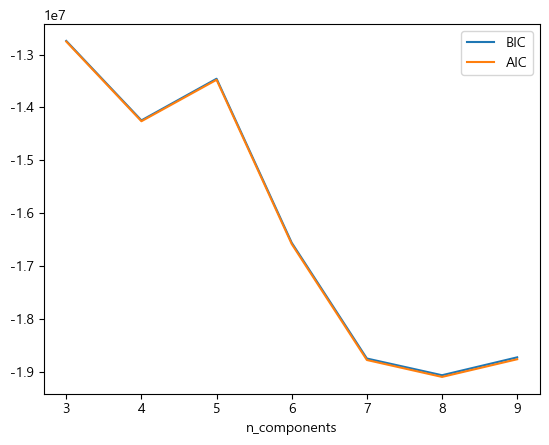

In [76]:
from sklearn.mixture import GaussianMixture


n_components = np.arange(3,10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(scaled_ltv_eda_master_cum_pu_X)
          for n in n_components]

plt.plot(n_components, [m.bic(scaled_ltv_eda_master_cum_pu_X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(scaled_ltv_eda_master_cum_pu_X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [77]:
best_components = [m.bic(scaled_ltv_eda_master_cum_pu_X) for m in models].index(min([m.bic(scaled_ltv_eda_master_cum_pu_X) for m in models]))+3

In [78]:
gmm = GaussianMixture(n_components = best_components, random_state=0)
gmm.fit(scaled_ltv_eda_master_cum_pu_X)
gmm.cluster_labels = gmm.predict(scaled_ltv_eda_master_cum_pu_X)

In [79]:
after_labeled_df = pd.merge(ltv_eda_master_cum_pu_features[scaled_ltv_eda_master_cum_pu_X.columns], ltv_eda_master_cum_pu_target, left_index = True, right_index = True, how='left')

after_labeled_df["label_from_gmm"] = gmm.cluster_labels


after_labeled_df["label_from_gmm_check"] = after_labeled_df["label_from_gmm"]

pd.options.display.float_format = '{:.2f}'.format 

for_relabel = pd.concat([after_labeled_df.groupby(["label_from_gmm"]).mean().sort_values(target_ltv).reset_index(), after_labeled_df.groupby(["label_from_gmm"]).agg('count').reset_index()[target_ltv].to_frame('label_from_gmm_user_cnt')], axis=1).sort_values(target_ltv).reset_index()

dictionary = {v: k for k, v in for_relabel.set_index('index')['label_from_gmm'].to_dict().items()}
after_labeled_df['label_from_gmm'] = after_labeled_df['label_from_gmm'].map(dictionary)

pd.concat([after_labeled_df.groupby(["label_from_gmm"]).mean().sort_values(target_ltv).reset_index(), after_labeled_df.groupby(["label_from_gmm"]).agg('count').reset_index()[target_ltv].to_frame('label_from_gmm_user_cnt')], axis=1).sort_values(target_ltv)

,label_from_gmm,start_gacha_sales_cum,1plus1_sales_cum,start_adv_pkg_sales_cum,welcome_pkg_sales_cum,crystal_use_amt_cum,monthly_sales_cum,start_pkg_5_sales_cum,start_pkg_1_sales_cum,5g_arti_get_cnt_cum,ticketrare_use_amt_cum,access_cnt_cum,gold_use_amt_cum,stamina_get_amt_cum,rankup_sales_cum,rare_sales_cum,spc_sales_cum,weekly_sales_cum,intelli_sales_cum,mystic_sales_cum,google_sales_cum,relay_sales_cum,etc_sales_cum,crst_sales_cum,rank_ach_sales_cum,equip_sales_cum,last_3d_sales,last_3d_purchase_cnt_cum,ltv_30,label_from_gmm_check,label_from_gmm_user_cnt
0,0,5089.98,1381.61,0.00,0.00,3171.00,0.00,0.00,0.00,3.16,277.09,347.33,8414067.47,3207.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,29143.23,3.00,69701
1,1,4732.84,0.00,3335.66,1109.16,3389.52,0.00,0.00,0.00,3.13,314.65,337.50,7510566.54,2947.31,0.00,0.00,8396.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29805.03,6.00,14785
2,2,4775.43,2493.72,2182.17,1239.93,3945.95,3617.83,1946.32,662.55,3.40,335.92,405.27,8918270.65,3519.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.45,37196.79,0.00,21316
3,3,7625.29,7792.71,1574.35,0.00,7470.13,3549.27,0.00,104.45,6.05,622.13,666.60,18034211.98,6240.43,9746.14,0.00,12121.40,0.00,9949.45,0.00,0.00,8280.28,0.00,0.00,0.00,0.00,18462.21,1.19,132921.92,2.00,9887
4,4,6351.38,12804.25,1651.44,1142.91,6663.44,4880.74,1751.79,313.98,4.75,517.02,438.29,10425305.57,3865.21,6529.76,8899.58,14106.90,4913.80,10829.97,8667.99,15240.22,8607.84,1320.72,249.21,2501.43,212.52,31086.59,1.62,196925.37,7.00,2613
5,5,9240.71,10363.14,2890.83,2527.54,7268.81,6364.79,3507.60,596.77,5.72,596.60,563.34,13484758.59,4799.72,10131.00,0.00,13434.65,10021.43,11627.63,17888.78,0.00,11080.28,0.00,0.00,0.00,0.00,30432.92,1.76,211338.99,4.00,14326
6,6,6032.89,28883.46,1424.30,1189.17,6314.57,4341.87,1480.51,285.46,3.82,464.97,297.24,5959756.42,2338.65,5680.93,37420.31,14182.40,6017.85,7831.25,10078.61,0.00,5704.09,3856.30,17606.71,2028.42,265.49,26743.85,1.36,222343.51,1.00,1642
7,7,9281.98,21953.65,2188.00,1742.83,9360.79,8913.10,2398.37,480.26,6.52,717.59,598.05,15367728.78,5385.61,10939.61,44199.53,25166.41,13026.59,27675.02,17908.91,0.00,14738.99,9495.99,0.00,16014.14,1981.41,60249.74,2.14,382142.22,5.00,6857


In [80]:
pd.options.display.float_format = '{:.2f}'.format 

pd.concat([after_labeled_df.groupby(["label_from_gmm"]).mean().sort_values(target_ltv).reset_index(), after_labeled_df.groupby(["label_from_gmm"]).agg('count').reset_index()[target_ltv].to_frame('label_from_gmm_user_cnt')], axis=1).sort_values(target_ltv).T

,0,1,2,3,4,5,6,7
label_from_gmm,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00
start_gacha_sales_cum,5089.98,4732.84,4775.43,7625.29,6351.38,9240.71,6032.89,9281.98
1plus1_sales_cum,1381.61,0.00,2493.72,7792.71,12804.25,10363.14,28883.46,21953.65
start_adv_pkg_sales_cum,0.00,3335.66,2182.17,1574.35,1651.44,2890.83,1424.30,2188.00
welcome_pkg_sales_cum,0.00,1109.16,1239.93,0.00,1142.91,2527.54,1189.17,1742.83
crystal_use_amt_cum,3171.00,3389.52,3945.95,7470.13,6663.44,7268.81,6314.57,9360.79
monthly_sales_cum,0.00,0.00,3617.83,3549.27,4880.74,6364.79,4341.87,8913.10
start_pkg_5_sales_cum,0.00,0.00,1946.32,0.00,1751.79,3507.60,1480.51,2398.37
start_pkg_1_sales_cum,0.00,0.00,662.55,104.45,313.98,596.77,285.46,480.26
5g_arti_get_cnt_cum,3.16,3.13,3.40,6.05,4.75,5.72,3.82,6.52


In [81]:
after_labeled_df.drop(["label_from_gmm_check"], axis=1, inplace=True)

In [82]:
after_labeled_df_org = after_labeled_df.copy()
after_labeled_df_org_dt = pd.merge(after_labeled_df_org, ltv_eda_master_raw['dt_nru'].to_frame(), left_index =True, right_index= True, how= 'left')


after_labeled_df = after_labeled_df[(after_labeled_df.index.isin(after_labeled_df_org_dt[(after_labeled_df_org_dt['dt_nru']>=train_start_date)&(after_labeled_df_org_dt['dt_nru']<=train_end_date)].index))]
after_labeled_df0 = after_labeled_df.copy()
after_labeled_df1 = after_labeled_df.copy()

In [83]:
alph_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

In [84]:
def gmm_cat(df):
    for i in range(len(alph_list)):
        if i == 0:
            df["label_from_gmm"] = np.where(df["label_from_gmm"]==i, alph_list[i], df["label_from_gmm"])
        else:
            df["label_from_gmm"] = np.where(df["label_from_gmm"]==str(i), alph_list[i], df["label_from_gmm"])

In [85]:
gmm_cat(after_labeled_df)
gmm_cat(after_labeled_df1)

In [86]:
for i in after_labeled_df.select_dtypes(exclude = ['object']).columns:
    after_labeled_df[i] = np.log1p(after_labeled_df[i])

In [87]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()
after_labeled_df2 = stand_scaler.fit_transform(after_labeled_df.drop("label_from_gmm", axis=1))

after_labeled_df2 = pd.DataFrame(after_labeled_df2, columns=after_labeled_df.drop("label_from_gmm", axis=1).columns, index = after_labeled_df.drop("label_from_gmm", axis=1).index)
after_labeled_df2 = pd.concat([after_labeled_df2,after_labeled_df["label_from_gmm"].to_frame()], axis=1)

In [88]:
def best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_data, y_target)
    return grid_model.best_params_.values()

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
   
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

fin_df = pd.DataFrame()
regroup_df0 = pd.DataFrame()
regroup_df1 = pd.DataFrame()

fin_list = []
regroup_list0 = []
regroup_list1 = []

for i in after_labeled_df2["label_from_gmm"].unique():
    print("seg",i,"시작")
    X_data = after_labeled_df2[after_labeled_df2["label_from_gmm"]==i].drop(["label_from_gmm",target_ltv], axis=1)
    X_data0 = after_labeled_df1[after_labeled_df1["label_from_gmm"]==i].drop(["label_from_gmm",target_ltv], axis=1)
    
    y_target = after_labeled_df2[after_labeled_df2["label_from_gmm"]==i][target_ltv]
    y_target0 = after_labeled_df1[after_labeled_df1["label_from_gmm"]==i][target_ltv]
    
    X_train , X_test , y_train , y_test = train_test_split(X_data , y_target, test_size=0.3, random_state=1)
    X_train0 , X_test0 , y_train0 , y_test0 = train_test_split(X_data0 , y_target0, test_size=0.3, random_state=1)
    
    ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
    lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
    xgb_params = {'learning_rate':[0.01, 0.05]}
    lgbm_params = {'learning_rate':[0.01, 0.05], 'num_leaves' : [4, 6, 8]}

    ridge_reg = Ridge(alpha=list(best_params(Ridge(), ridge_params))[0])
    lasso_reg = Lasso(alpha=list(best_params(Lasso(), lasso_params))[0])
    xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=list(best_params(XGBRegressor(), xgb_params))[0], colsample_bytree=0.5, subsample=0.8, n_jobs=-1)
    lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1], subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose= -1, verbose_eval=False, n_jobs=-1)
    
    X_train_n = X_train.values
    X_test_n = X_test.values
    y_train_n = y_train.values
    
    ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
    lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
    xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)   
    lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)
    
    Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
    Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)
        
    meta_model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1],verbose= -1, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose_eval=False, n_jobs=-1)
        
    meta_model_lgbm.fit(Stack_final_X_train, y_train)
    model_name = "seg_"+i
#     pickle.dump(meta_model_lgbm, open('C:/Users/kihwanb/Desktop/업무/★프로젝트/LTV/모델/'+'regressor_'+model_name+'_231204.pkl', 'wb'))
    
    final = meta_model_lgbm.predict(Stack_final_X_test)
    print('-------------seg', i,'r2_score','----------------------')
    print(r2_score(y_test, final))
    
    check = pd.merge(X_test0, y_test0, left_index =True, right_index= True, how= 'left')
#     check = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check), columns = check.columns, index = check.index))
    
    check2 = X_test.copy()
    check2['pred'] = final
    check2 = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check2), columns = check2.columns, index = check2.index))
    
    check_fin = pd.merge(check, check2['pred'], left_index =True, right_index= True, how= 'left')
    check_fin['error'] = check_fin[target_ltv]-check_fin['pred']
    check_fin['error_rate'] = (check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv]    
    
    check_fin['mape'] = 1
    check_fin['mape'] = np.where((check_fin[target_ltv]==0)&(check_fin['pred']==0),0,check_fin['mape'])
    check_fin['mape'] = np.where((check_fin[target_ltv]>0)&(check_fin['pred']>0),(check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv],check_fin['mape'])    
    check_fin['mape'] = abs(check_fin['mape'])
    
    
    #if np.sqrt(mean_squared_log_error(check_fin[target_ltv], check_fin['pred'])) > 1:
    if (check_fin[target_ltv].mean()>300000)&((abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum()))>0.15):        
        regroup_df0 = pd.concat([regroup_df0,check_fin])
        regroup_list0.append(i)
        print('-------------seg regroup', i,'--------------------------')
        print('----------------------------------------------------')
        print('seg', i, '유저수 :',len(check_fin[target_ltv]))
        print('seg', i, 'Real ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin[target_ltv].mean()))
        print('seg', i, 'Pred ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin['pred'].mean()))
        print('-----------------------------------------------------')
        print('seg', i, '전체 mape(모수: Real LTV) :', '{0:.3f}'.format(abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum())))    
        #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(check_fin[target_ltv], check_fin['pred']))))
        print('seg', i, 'abs 30%오차 이내 :',  '{0:.3f}'.format(len(check_fin[abs(check_fin['error_rate'])<=0.3]['error'])/len(check_fin['error'])))
        print('seg', i, '과다추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']>0]['error'])/len(check_fin['error'])))
        print('seg', i, '과소추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']<0]['error'])/len(check_fin['error'])))
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')
    elif (check_fin[target_ltv].mean()<300000)&((abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum()))>0.25):        
        regroup_df1 = pd.concat([regroup_df1,check_fin])
        regroup_list1.append(i)
        print('-------------seg regroup', i,'--------------------------')
        print('----------------------------------------------------')
        print('seg', i, '유저수 :',len(check_fin[target_ltv]))
        print('seg', i, 'Real ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin[target_ltv].mean()))
        print('seg', i, 'Pred ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin['pred'].mean()))
        print('-----------------------------------------------------')
        print('seg', i, '전체 mape(모수: Real LTV) :', '{0:.3f}'.format(abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum())))    
        #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(check_fin[target_ltv], check_fin['pred']))))
        print('seg', i, 'abs 30%오차 이내 :',  '{0:.3f}'.format(len(check_fin[abs(check_fin['error_rate'])<=0.3]['error'])/len(check_fin['error'])))
        print('seg', i, '과다추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']>0]['error'])/len(check_fin['error'])))
        print('seg', i, '과소추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']<0]['error'])/len(check_fin['error'])))
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')
    else:
        fin_list.append(i)
        fin_df = pd.concat([fin_df,check_fin])
        print('-----------------seg', i,'----------------------')
        print('----------------------------------------------------')
        print('seg', i, '유저수 :',len(check_fin[target_ltv]))
        print('seg', i, 'Real ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin[target_ltv].mean()))
        print('seg', i, 'Pred ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin['pred'].mean()))
        print('-----------------------------------------------------')
        print('seg', i, '전체 mape(모수: Real LTV) :', '{0:.3f}'.format(abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum())))    
        #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(check_fin[target_ltv], check_fin['pred']))))
        print('seg', i, 'abs 30%오차 이내 :',  '{0:.3f}'.format(len(check_fin[abs(check_fin['error_rate'])<=0.3]['error'])/len(check_fin['error'])))
        print('seg', i, '과다추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']<0]['error'])/len(check_fin['error'])))
        print('seg', i, '과소추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']>0]['error'])/len(check_fin['error'])))
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')


if len(fin_list)>0:        
    print('-------------포함 seg 전체----------------------------')
    print('------------------',set(fin_list),'---------------------')
    print('전체 유저수 :',len(fin_df[target_ltv]))
    print('전체 Real ',target_ltv,'평균 :', '{0:.3f}'.format(fin_df[target_ltv].mean()))
    print('전체 Pred ',target_ltv,'평균 :', '{0:.3f}'.format(fin_df['pred'].mean()))
    print('-----------------------------------------------------')
    print('전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((fin_df[target_ltv].sum()-fin_df['pred'].sum())/fin_df[target_ltv].sum())))
    #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(fin_df[target_ltv], fin_df['pred']))))
    print('전체 abs 30%오차 이내 :',  '{0:.3f}'.format(len(fin_df[abs(fin_df['error_rate'])<=0.3]['error'])/len(fin_df['error'])))
    print('과다추정 case :',  '{0:.3f}'.format(len(fin_df[fin_df['error']<0]['error'])/len(fin_df['error'])))
    print('과소추정 case :',  '{0:.3f}'.format(len(fin_df[fin_df['error']>0]['error'])/len(fin_df['error'])))
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')


if len(regroup_list0)>0: 
    print('-----------------regroup0 전체-----------------------')
    print('---------------',set(regroup_list0),'-----------------')
    print('전체 유저수 :',len(regroup_df0[target_ltv]))
    print('전체 Real ',target_ltv,'평균 :', '{0:.3f}'.format(regroup_df0[target_ltv].mean()))
    print('전체 Pred ',target_ltv,'평균 :', '{0:.3f}'.format(regroup_df0['pred'].mean()))
    print('-----------------------------------------------------')
    print('전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((regroup_df0[target_ltv].sum()-regroup_df0['pred'].sum())/regroup_df0[target_ltv].sum())))
    #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(regroup_df0[target_ltv], regroup_df0['pred']))))
    print('전체 abs 30%오차 이내 :',  '{0:.3f}'.format(len(regroup_df0[abs(regroup_df0['error_rate'])<=0.3]['error'])/len(regroup_df0['error'])))
    print('과다추정 case :',  '{0:.3f}'.format(len(regroup_df0[regroup_df0['error']<0]['error'])/len(regroup_df0['error'])))
    print('과소추정 case :',  '{0:.3f}'.format(len(regroup_df0[regroup_df0['error']>0]['error'])/len(regroup_df0['error'])))
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')

if len(regroup_list1)>0: 
    print('-----------------regroup1 전체-----------------------')
    print('-----------------',set(regroup_list1),'-------------------')
    print('전체 유저수 :',len(regroup_df1[target_ltv]))
    print('전체 Real ',target_ltv,'평균 :', '{0:.3f}'.format(regroup_df1[target_ltv].mean()))
    print('전체 Pred ',target_ltv,'평균 :', '{0:.3f}'.format(regroup_df1['pred'].mean()))
    print('-----------------------------------------------------')
    print('전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((regroup_df1[target_ltv].sum()-regroup_df1['pred'].sum())/regroup_df1[target_ltv].sum())))
    #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(regroup_df0[target_ltv], regroup_df0['pred']))))
    print('전체 abs 30%오차 이내 :',  '{0:.3f}'.format(len(regroup_df1[abs(regroup_df1['error_rate'])<=0.3]['error'])/len(regroup_df1['error'])))
    print('과다추정 case :',  '{0:.3f}'.format(len(regroup_df1[regroup_df1['error']<0]['error'])/len(regroup_df1['error'])))
    print('과소추정 case :',  '{0:.3f}'.format(len(regroup_df1[regroup_df1['error']>0]['error'])/len(regroup_df1['error'])))
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')




seg A 시작
-------------seg A r2_score ----------------------
0.2598720836501228
-------------seg regroup A --------------------------
----------------------------------------------------
seg A 유저수 : 19159
seg A Real  ltv_30 평균 : 31157.925
seg A Pred  ltv_30 평균 : 13450.410
-----------------------------------------------------
seg A 전체 mape(모수: Real LTV) : 0.568
seg A abs 30%오차 이내 : 0.412
seg A 과다추정 case : 0.369
seg A 과소추정 case : 0.631
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
seg B 시작
-------------seg B r2_score ----------------------
0.6903272096575952
-------------seg regroup B --------------------------
----------------------------------------------------
seg B 유저수 : 4305
seg B Real  ltv_30 평균 : 30825.294
seg B Pred  ltv_30 평균 : 22695.472
-----------------------------------------------------
seg B 전체 mape(모수: Real LTV

In [90]:
set(fin_list)

{'D', 'E', 'F', 'G', 'H'}

In [91]:
##리그룹

In [92]:
set(regroup_list0)

set()

In [93]:
set(regroup_list1)

{'A', 'B', 'C'}

# 실제 데이터

In [94]:
fin_check_df0 = pd.DataFrame()
if len(fin_list)>0:
    for i in fin_list:
        fin_check_df0 = pd.concat([fin_check_df0, after_labeled_df_org[after_labeled_df_org['label_from_gmm']==alph_list.index(i)]])

In [95]:
train_start_date_for_outlier = (datetime.strptime(train_end_date, '%Y-%m-%d') -  timedelta(days=360)).strftime('%Y-%m-%d')

In [96]:
train_pu = ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=train_start_date_for_outlier)&(ltv_eda_master_raw_dt['dt_nru']<=train_end_date)&(ltv_eda_master_raw_dt[target_ltv]>0)]

train_outlier_pu = train_pu[train_pu.index.isin(outlier_index(for_check_train_outlier,[target_ltv],1.7))]
train_outlier_pu['label_from_gmm'] = best_components+1
train_outlier_pu = train_outlier_pu[after_labeled_df_org.columns]

test_outlier_pu = ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=test_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=test_end_date)&(ltv_eda_master_raw_dt[last_real_ltv]>=outlier_test_value)][confirmed_col]
test_outlier_pu['label_from_gmm'] = best_components+1
test_outlier_pu = test_outlier_pu[after_labeled_df_org.columns]

In [97]:
# train_outlier_pu_min = train_pu[train_pu['user_key'].isin(zero_value_users2_user_key)]
# train_outlier_pu_min['label_from_gmm'] = best_components+2
# train_outlier_pu_min = train_outlier_pu_min[fin_check_df0.columns]

In [98]:
# test_outlier_pu_min = ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=test_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=test_end_date)&(ltv_eda_master_raw_dt['user_key'].isin(zero_value_users2_user_key))]
# test_outlier_pu_min['label_from_gmm'] = best_components+2
# test_outlier_pu_min = test_outlier_pu_min[fin_check_df0.columns]

In [99]:
fin_check_df0 = pd.concat([fin_check_df0,train_outlier_pu])
fin_check_df0 = pd.concat([fin_check_df0,test_outlier_pu])
# fin_check_df0 = pd.concat([fin_check_df0,train_outlier_pu_min])
# fin_check_df0 = pd.concat([fin_check_df0,test_outlier_pu_min])

In [100]:
fin_check_df0['label_from_gmm'].unique()

array([7, 5, 3, 6, 4, 9], dtype=int64)

In [101]:
fin_check_df_org = fin_check_df0.copy()
fin_check_df = fin_check_df0.copy()

In [102]:
for i in fin_check_df.drop('label_from_gmm',axis=1).columns:
    fin_check_df[i] = np.log1p(fin_check_df[i])

In [103]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()
fin_check_df2 = stand_scaler.fit_transform(fin_check_df.drop("label_from_gmm", axis=1))

fin_check_df2 = pd.DataFrame(fin_check_df2, columns=fin_check_df.drop("label_from_gmm", axis=1).columns, index = fin_check_df.drop("label_from_gmm", axis=1).index)
fin_check_df2 = pd.concat([fin_check_df2, fin_check_df["label_from_gmm"].to_frame()], axis=1)

In [104]:
gmm_cat(fin_check_df2)

In [105]:
# ltv_eda_master_raw0 = pd.read_pickle('C:/Users/kihwanb/Desktop/업무/★프로젝트/ltv/ltv_eda_master_cum_231201.pkl')
# ltv_eda_master_raw0['dt_nru'] = pd.to_datetime(ltv_eda_master_raw0['dt_nru'])

In [106]:
header_df = ltv_eda_master_raw_dt[['dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key']]
header_df_w_ltv = ltv_eda_master_raw_dt[['dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key', last_real_ltv ,target_ltv]]

In [107]:
fin_check_df0 = pd.merge(fin_check_df0, header_df, how='left', left_index=True, right_index=True)
fin_check_df2 = pd.merge(fin_check_df2, header_df, how='left', left_index=True, right_index=True)

In [108]:
check_df = ltv_eda_master_raw_dt[(ltv_eda_master_raw_dt['dt_nru']>=test_start_date)&(ltv_eda_master_raw_dt['dt_nru']<=test_end_date)&(ltv_eda_master_raw_dt['user_key'].isin(ltv_eda_master_for_reg_fin['user_key'].tolist()))]

In [109]:
def minority_oversampling(df0, df_org0, target_ltv):
    from imblearn.over_sampling import SMOTE

    new_regroup_df = pd.DataFrame()

    for i in df0['label_from_gmm'].unique():
        df_org = df_org0[df_org0['label_from_gmm'] == alph_list.index(i)]
        df = df0[df0['label_from_gmm'] == i]
        df["label_from_gmm"] = np.where(df["label_from_gmm"] == i, alph_list.index(i), df["label_from_gmm"])

        df_org['sales_col_sum'] = df_org.loc[:, df_org.columns.str.contains('sales')].sum(axis=1)

        threshold_list = np.arange(0.1, 0.4, 0.01)

        for threshold in threshold_list:
            sales_sum0_check = df_org['sales_col_sum'] < df_org[df_org['sales_col_sum'] > 0]['sales_col_sum'].quantile(threshold)
            top_check = df_org[target_ltv] > df_org[target_ltv].quantile(1 - threshold)

            df['label_smote'] = np.where((sales_sum0_check) & (top_check), 1, 0)

            header_list = ['dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no', 'stove_nickname_no', 'user_key', 'label_from_gmm']

            if len(df[df['label_smote'] == 1]) >= 6:
                X = df.drop(header_list + ['label_smote'], axis=1)
                y = df['label_smote'].to_frame()
                smote = SMOTE(random_state=42)
                X_over, y_over = smote.fit_resample(X, y)
                over_df = pd.concat([X_over, y_over], axis=1)
                over_df = over_df.drop('label_smote', axis=1)
                new_regroup_df = pd.concat([new_regroup_df, over_df])
                break 
            else:
                new_regroup_df = pd.concat([new_regroup_df, df.drop(header_list + ['label_smote'], axis=1)])

    return new_regroup_df

In [110]:
first_fin_df = pd.DataFrame()

for i in fin_check_df2["label_from_gmm"].unique():
    if len(fin_check_df2[(fin_check_df2["label_from_gmm"]==i)&(fin_check_df2['dt_nru']>=test_start_date)&(fin_check_df2['dt_nru']<=test_end_date)])>0:
        print("seg",i,"_시작")
        trains = fin_check_df2[(fin_check_df2["label_from_gmm"]==i)&(fin_check_df2['dt_nru']>=train_start_date)&(fin_check_df2['dt_nru']<=train_end_date)]
        trains0 = fin_check_df0[(fin_check_df0["label_from_gmm"]==alph_list.index(i))&(fin_check_df0['dt_nru']>=train_start_date)&(fin_check_df0['dt_nru']<=train_end_date)]
        X_train = minority_oversampling(trains, trains0, target_ltv).drop(target_ltv, axis=1)

        X_train0 = fin_check_df0[(fin_check_df0["label_from_gmm"]==alph_list.index(i))&(fin_check_df0['dt_nru']>=train_start_date)&(fin_check_df0['dt_nru']<=train_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)

        X_test = fin_check_df2[(fin_check_df2["label_from_gmm"]==i)&(fin_check_df2['dt_nru']>=test_start_date)&(fin_check_df2['dt_nru']<=test_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)  

        X_test0 = fin_check_df0[(fin_check_df0["label_from_gmm"]==alph_list.index(i))&(fin_check_df0['dt_nru']>=test_start_date)&(fin_check_df0['dt_nru']<=test_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)     


        y_train = minority_oversampling(trains, trains0, target_ltv)[target_ltv]
        y_train0 = fin_check_df0[(fin_check_df0["label_from_gmm"]==alph_list.index(i))&(fin_check_df0['dt_nru']>=train_start_date)&(fin_check_df0['dt_nru']<=train_end_date)][target_ltv]

        y_test = fin_check_df2[(fin_check_df2["label_from_gmm"]==i)&(fin_check_df2['dt_nru']>=test_start_date)&(fin_check_df2['dt_nru']<=test_end_date)][target_ltv]
        y_test0 = fin_check_df0[(fin_check_df0["label_from_gmm"]==alph_list.index(i))&(fin_check_df0['dt_nru']>=test_start_date)&(fin_check_df0['dt_nru']<=test_end_date)][target_ltv]
        
    

        ridge_reg = Ridge(alpha=list(best_params(Ridge(), ridge_params))[0])
        lasso_reg = Lasso(alpha=list(best_params(Lasso(), lasso_params))[0])
        xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=list(best_params(XGBRegressor(), xgb_params))[0], colsample_bytree=0.5, subsample=0.8, n_jobs=-1)
        lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1], subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose= -1, verbose_eval=False, n_jobs=-1)

        X_train_n = X_train.values
        X_test_n = X_test.values
        y_train_n = y_train.values

        ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
        lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
        xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)   
        lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

        Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
        Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)


        meta_model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1],verbose= -1, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose_eval=False, n_jobs=-1)

        meta_model_lgbm.fit(Stack_final_X_train, y_train)

        final = meta_model_lgbm.predict(Stack_final_X_test)
        print('-------------seg', i,'r2_score','----------------------')
        print(r2_score(y_test, final))

        check = pd.merge(X_test0, y_test0, left_index =True, right_index= True, how= 'left')
    #     check = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check), columns = check.columns, index = check.index))

        check2 = X_test.copy()
        check2['pred'] = final
        check2 = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check2), columns = check2.columns, index = check2.index))

        check_fin = pd.merge(check, check2['pred'], left_index =True, right_index= True, how= 'left')
        check_fin['error'] = check_fin[target_ltv]-check_fin['pred']
        check_fin['error_rate'] = (check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv]
        
        check_fin['mape'] = 1
        check_fin['mape'] = np.where((check_fin[target_ltv]==0)&(check_fin['pred']==0),0,check_fin['mape'])
        check_fin['mape'] = np.where((check_fin[target_ltv]>0)&(check_fin['pred']>0),(check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv],check_fin['mape'])    
        check_fin['mape'] = abs(check_fin['mape'])
        
        check_fin['seg'] = i


        print('-------------seg', i,'------------------------------')
        print('----------------------------------------------------')
        print('seg', i, '유저수 :',len(check_fin[target_ltv]))
        print('seg', i, 'Real ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin[target_ltv].mean()))
        print('seg', i, 'Pred ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin['pred'].mean()))
        print('-----------------------------------------------------')
        print('seg', i, '전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum())))
        #print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(check_fin[target_ltv], check_fin['pred']))))
        print('seg', i, 'abs 30%오차 이내 :',  '{0:.3f}'.format(len(check_fin[abs(check_fin['error_rate'])<=0.3]['error'])/len(check_fin['error'])))
        print('seg', i, '과다추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']<0]['error'])/len(check_fin['error'])))
        print('seg', i, '과소추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']>0]['error'])/len(check_fin['error'])))
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')
        print('----------------------------------------------------')


        first_fin_df = pd.concat([first_fin_df,check_fin])
    
    
print('-------------포함된 SEG-----------------------------')
print('------------',set(first_fin_df['seg'].tolist()),'-----------------------')
print('----------------------------------------------------')
print('전체 유저수 :',len(first_fin_df[target_ltv]))
print('전체 비중 :',len(first_fin_df[target_ltv])/len(check_df[(check_df['dt_nru']>=test_start_date)&(check_df['dt_nru']<=test_end_date)]))
print('전체 Real ',target_ltv,'평균 :', '{0:.3f}'.format(first_fin_df[target_ltv].mean()))
print('전체 Pred ',target_ltv,'평균 :', '{0:.3f}'.format(first_fin_df['pred'].mean()))
print('-----------------------------------------------------')
print('전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((first_fin_df[target_ltv].sum()-first_fin_df['pred'].sum())/first_fin_df[target_ltv].sum())))
#print('전체 RMSLE :', '{0:.3f}'.format(np.sqrt(mean_squared_log_error(first_fin_df[target_ltv], first_fin_df['pred']))))
print('전체 abs 30%오차 이내 :',  '{0:.3f}'.format(len(first_fin_df[abs(first_fin_df['error_rate'])<=0.3]['error'])/len(first_fin_df['error'])))
print('과다추정 case :',  '{0:.3f}'.format(len(first_fin_df[first_fin_df['error']<0]['error'])/len(first_fin_df['error'])))
print('과소추정 case :',  '{0:.3f}'.format(len(first_fin_df[first_fin_df['error']>0]['error'])/len(first_fin_df['error'])))
print('----------------------------------------------------')
print('----------------------------------------------------')
print('----------------------------------------------------')
print('----------------------------------------------------')

seg H _시작
-------------seg H r2_score ----------------------
0.5914486937060437
-------------seg H ------------------------------
----------------------------------------------------
seg H 유저수 : 137
seg H Real  ltv_30 평균 : 345372.821
seg H Pred  ltv_30 평균 : 259858.768
-----------------------------------------------------
seg H 전체 mape(모수: Real LTV) : 0.248
seg H abs 30%오차 이내 : 0.380
seg H 과다추정 case : 0.569
seg H 과소추정 case : 0.431
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
seg F _시작
-------------seg F r2_score ----------------------
0.5889245289240076
-------------seg F ------------------------------
----------------------------------------------------
seg F 유저수 : 263
seg F Real  ltv_30 평균 : 176101.817
seg F Pred  ltv_30 평균 : 135093.903
-----------------------------------------------------
seg F 전체 mape(모수: Real LTV) : 0

In [111]:
##리그룹

In [112]:
re_labeled_fin_df = pd.DataFrame()
regroup_need_list = []

if len(regroup_list0)>0:
    re_labeled_total_df0 = pd.DataFrame()
    for i in regroup_list0:
        re_labeled_total_df0 = pd.concat([re_labeled_total_df0, after_labeled_df_org[after_labeled_df_org['label_from_gmm']==alph_list.index(i)]])

    re_labeled_total_org = re_labeled_total_df0.copy()
    re_labeled_total_df = re_labeled_total_df0.copy()

    for i in re_labeled_total_df.drop('label_from_gmm',axis=1).columns:
        re_labeled_total_df[i] = np.log1p(re_labeled_total_df[i])

    stand_scaler = StandardScaler()
    re_labeled_total_df2 = stand_scaler.fit_transform(re_labeled_total_df.drop("label_from_gmm", axis=1))

    re_labeled_total_df2 = pd.DataFrame(re_labeled_total_df2, columns=re_labeled_total_df.drop("label_from_gmm", axis=1).columns, index = re_labeled_total_df.drop("label_from_gmm", axis=1).index)
    re_labeled_total_df2 = pd.concat([re_labeled_total_df2, re_labeled_total_df["label_from_gmm"].to_frame()], axis=1)  

    gmm_cat(re_labeled_total_df2)

    re_labeled_total_df0 = pd.merge(re_labeled_total_df0, header_df, how='left', left_index=True, right_index=True)
    re_labeled_total_df2 = pd.merge(re_labeled_total_df2, header_df, how='left', left_index=True, right_index=True)

    re_labeled_fin_df = pd.DataFrame()
    regroup_need_list = []

    for i in re_labeled_total_df2["label_from_gmm"].unique():
        if len(re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=test_start_date)&(re_labeled_total_df2['dt_nru']<=test_end_date)])>0:
            print("seg",i,"시작")
            trains = re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=train_start_date)&(re_labeled_total_df2['dt_nru']<=train_end_date)]
            trains0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=train_start_date)&(re_labeled_total_df0['dt_nru']<=train_end_date)]
            X_train = minority_oversampling(trains, trains0, target_ltv).drop(target_ltv, axis=1)

            X_train0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=train_start_date)&(re_labeled_total_df0['dt_nru']<=train_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)

            X_test = re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=test_start_date)&(re_labeled_total_df2['dt_nru']<=test_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)  

            X_test0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=test_start_date)&(re_labeled_total_df0['dt_nru']<=test_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)     


            y_train = minority_oversampling(trains, trains0, target_ltv)[target_ltv]
            y_train0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=train_start_date)&(re_labeled_total_df0['dt_nru']<=train_end_date)][target_ltv]

            y_test = re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=test_start_date)&(re_labeled_total_df2['dt_nru']<=test_end_date)][target_ltv]
            y_test0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=test_start_date)&(re_labeled_total_df0['dt_nru']<=test_end_date)][target_ltv]

            ridge_reg = Ridge(alpha=list(best_params(Ridge(), ridge_params))[0])
            lasso_reg = Lasso(alpha=list(best_params(Lasso(), lasso_params))[0])
            xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=list(best_params(XGBRegressor(), xgb_params))[0], colsample_bytree=0.5, subsample=0.8, n_jobs=-1)
            lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1], subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose= -1, verbose_eval=False, n_jobs=-1)

            X_train_n = X_train.values
            X_test_n = X_test.values
            y_train_n = y_train.values

            ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
            lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
            xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)   
            lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

            Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
            Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)


            meta_model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1],verbose= -1, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose_eval=False, n_jobs=-1)

            meta_model_lgbm.fit(Stack_final_X_train, y_train)

            final_regroup = meta_model_lgbm.predict(Stack_final_X_test)
            print('-------------seg', i,'r2_score','----------------------')
            print(r2_score(y_test, final_regroup))

            check = pd.merge(X_test0, y_test0, left_index =True, right_index= True, how= 'left')
        #     check = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check), columns = check.columns, index = check.index))

            check2 = X_test.copy()
            check2['pred'] = final_regroup
            check2 = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check2), columns = check2.columns, index = check2.index))

            check_fin = pd.merge(check, check2['pred'], left_index =True, right_index= True, how= 'left')
            check_fin['error'] = check_fin[target_ltv]-check_fin['pred']
            check_fin['error_rate'] = (check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv]
            check_fin['mape'] = abs((check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv])
            check_fin['seg'] = i

            #if (abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum()))>0.3:

            re_labeled_fin_df = pd.concat([re_labeled_fin_df,check_fin])


            print('-------------seg', i,'------------------------------')
            print('----------------------------------------------------')
            print('seg', i, '유저수 :',len(check_fin[target_ltv]))
            print('seg', i, 'Real ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin[target_ltv].mean()))
            print('seg', i, 'Pred ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin['pred'].mean()))
            print('-----------------------------------------------------')
            print('seg', i, '전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum())))
            print('seg', i, 'abs 30%오차 이내 :',  '{0:.3f}'.format(len(check_fin[abs(check_fin['error_rate'])<=0.3]['error'])/len(check_fin['error'])))
            print('seg', i, '과다추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']<0]['error'])/len(check_fin['error'])))
            print('seg', i, '과소추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']>0]['error'])/len(check_fin['error'])))
            print('----------------------------------------------------')
            print('----------------------------------------------------')
            print('----------------------------------------------------')
            print('----------------------------------------------------')


            if (abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum()))>0.3:
                regroup_need_list.append(i)
            else:
                pass

    print('-------------포함된 SEG-----------------------------')
    print('-------------',set(regroup_list0),'------------------------')
    print('----------------------------------------------------')
    print('전체 유저수 :',len(re_labeled_fin_df[target_ltv]))
    print('전체 비중 :',len(re_labeled_fin_df[target_ltv])/len(check_df[(check_df['dt_nru']>=test_start_date)&(check_df['dt_nru']<=test_end_date)]))
    print('전체 Real ',target_ltv,'평균 :', '{0:.3f}'.format(re_labeled_fin_df[target_ltv].mean()))
    print('전체 Pred ',target_ltv,'평균 :', '{0:.3f}'.format(re_labeled_fin_df['pred'].mean()))
    print('-----------------------------------------------------')
    print('전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((re_labeled_fin_df[target_ltv].sum()-re_labeled_fin_df['pred'].sum())/re_labeled_fin_df[target_ltv].sum())))
    print('전체 abs 30%오차 이내 :',  '{0:.3f}'.format(len(re_labeled_fin_df[abs(re_labeled_fin_df['error_rate'])<=0.3]['error'])/len(re_labeled_fin_df['error'])))
    print('과다추정 case :',  '{0:.3f}'.format(len(re_labeled_fin_df[re_labeled_fin_df['error']<0]['error'])/len(re_labeled_fin_df['error'])))
    print('과소추정 case :',  '{0:.3f}'.format(len(re_labeled_fin_df[re_labeled_fin_df['error']>0]['error'])/len(re_labeled_fin_df['error'])))
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
else:
    print('regroup_list0 :', len(regroup_list0))

regroup_list0 : 0


In [113]:
re_labeled_fin_df2 = pd.DataFrame()
regroup_need_list2 = []

if len(regroup_list1)>0:
    re_labeled_total_df0 = pd.DataFrame()
    for i in regroup_list1:
        re_labeled_total_df0 = pd.concat([re_labeled_total_df0, after_labeled_df_org[after_labeled_df_org['label_from_gmm']==alph_list.index(i)]])

    re_labeled_total_org = re_labeled_total_df0.copy()
    re_labeled_total_df = re_labeled_total_df0.copy()

    for i in re_labeled_total_df.drop('label_from_gmm',axis=1).columns:
        re_labeled_total_df[i] = np.log1p(re_labeled_total_df[i])

    stand_scaler = StandardScaler()
    re_labeled_total_df2 = stand_scaler.fit_transform(re_labeled_total_df.drop("label_from_gmm", axis=1))

    re_labeled_total_df2 = pd.DataFrame(re_labeled_total_df2, columns=re_labeled_total_df.drop("label_from_gmm", axis=1).columns, index = re_labeled_total_df.drop("label_from_gmm", axis=1).index)
    re_labeled_total_df2 = pd.concat([re_labeled_total_df2, re_labeled_total_df["label_from_gmm"].to_frame()], axis=1)  

    gmm_cat(re_labeled_total_df2)

    re_labeled_total_df0 = pd.merge(re_labeled_total_df0, header_df, how='left', left_index=True, right_index=True)
    re_labeled_total_df2 = pd.merge(re_labeled_total_df2, header_df, how='left', left_index=True, right_index=True)

    re_labeled_fin_df2 = pd.DataFrame()
    regroup_need_list2 = []

    for i in re_labeled_total_df2["label_from_gmm"].unique():
        if len(re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=test_start_date)&(re_labeled_total_df2['dt_nru']<=test_end_date)])>0:
            print("seg",i,"시작")
            trains = re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=train_start_date)&(re_labeled_total_df2['dt_nru']<=train_end_date)]
            trains0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=train_start_date)&(re_labeled_total_df0['dt_nru']<=train_end_date)]
            X_train = minority_oversampling(trains, trains0, target_ltv).drop(target_ltv, axis=1)

            X_train0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=train_start_date)&(re_labeled_total_df0['dt_nru']<=train_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)

            X_test = re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=test_start_date)&(re_labeled_total_df2['dt_nru']<=test_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)  

            X_test0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=test_start_date)&(re_labeled_total_df0['dt_nru']<=test_end_date)].drop(["label_from_gmm",target_ltv,'dt_nru', 'release_country_cd', 'game_user_id', 'stove_member_no','stove_nickname_no', 'user_key'], axis=1)     


            y_train = minority_oversampling(trains, trains0, target_ltv)[target_ltv]
            y_train0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=train_start_date)&(re_labeled_total_df0['dt_nru']<=train_end_date)][target_ltv]

            y_test = re_labeled_total_df2[(re_labeled_total_df2["label_from_gmm"]==i)&(re_labeled_total_df2['dt_nru']>=test_start_date)&(re_labeled_total_df2['dt_nru']<=test_end_date)][target_ltv]
            y_test0 = re_labeled_total_df0[(re_labeled_total_df0["label_from_gmm"]==alph_list.index(i))&(re_labeled_total_df0['dt_nru']>=test_start_date)&(re_labeled_total_df0['dt_nru']<=test_end_date)][target_ltv]

            ridge_reg = Ridge(alpha=list(best_params(Ridge(), ridge_params))[0])
            lasso_reg = Lasso(alpha=list(best_params(Lasso(), lasso_params))[0])
            xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=list(best_params(XGBRegressor(), xgb_params))[0], colsample_bytree=0.5, subsample=0.8, n_jobs=-1)
            lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1], subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose= -1, verbose_eval=False, n_jobs=-1)

            X_train_n = X_train.values
            X_test_n = X_test.values
            y_train_n = y_train.values

            ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
            lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
            xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)   
            lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

            Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
            Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)


            meta_model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=list(best_params(LGBMRegressor(), lgbm_params))[0], num_leaves=list(best_params(LGBMRegressor(), lgbm_params))[1],verbose= -1, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose_eval=False, n_jobs=-1)

            meta_model_lgbm.fit(Stack_final_X_train, y_train)

            final_regroup = meta_model_lgbm.predict(Stack_final_X_test)
            print('-------------seg', i,'r2_score','----------------------')
            print(r2_score(y_test, final_regroup))

            check = pd.merge(X_test0, y_test0, left_index =True, right_index= True, how= 'left')
        #     check = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check), columns = check.columns, index = check.index))

            check2 = X_test.copy()
            check2['pred'] = final_regroup
            check2 = np.expm1(pd.DataFrame(stand_scaler.inverse_transform(check2), columns = check2.columns, index = check2.index))

            check_fin = pd.merge(check, check2['pred'], left_index =True, right_index= True, how= 'left')
            check_fin['error'] = check_fin[target_ltv]-check_fin['pred']
            check_fin['error_rate'] = (check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv]
            check_fin['mape'] = abs((check_fin[target_ltv]-check_fin['pred'])/check_fin[target_ltv])
            check_fin['seg'] = i

            #if (abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum()))>0.3:

            re_labeled_fin_df2 = pd.concat([re_labeled_fin_df2,check_fin])


            print('-------------seg', i,'------------------------------')
            print('----------------------------------------------------')
            print('seg', i, '유저수 :',len(check_fin[target_ltv]))
            print('seg', i, 'Real ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin[target_ltv].mean()))
            print('seg', i, 'Pred ',target_ltv,'평균 :', '{0:.3f}'.format(check_fin['pred'].mean()))
            print('-----------------------------------------------------')
            print('seg', i, '전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum())))
            print('seg', i, 'abs 30%오차 이내 :',  '{0:.3f}'.format(len(check_fin[abs(check_fin['error_rate'])<=0.3]['error'])/len(check_fin['error'])))
            print('seg', i, '과다추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']<0]['error'])/len(check_fin['error'])))
            print('seg', i, '과소추정 case :',  '{0:.3f}'.format(len(check_fin[check_fin['error']>0]['error'])/len(check_fin['error'])))
            print('----------------------------------------------------')
            print('----------------------------------------------------')
            print('----------------------------------------------------')
            print('----------------------------------------------------')


            if (abs((check_fin[target_ltv].sum()-check_fin['pred'].sum())/check_fin[target_ltv].sum()))>0.3:
                regroup_need_list2.append(i)
            else:
                pass

    print('-------------포함된 SEG-----------------------------')
    print('-------------',set(regroup_list1),'------------------------')
    print('----------------------------------------------------')
    print('전체 유저수 :',len(re_labeled_fin_df2[target_ltv]))
    print('전체 비중 :',len(re_labeled_fin_df2[target_ltv])/len(check_df[(check_df['dt_nru']>=test_start_date)&(check_df['dt_nru']<=test_end_date)]))
    print('전체 Real ',target_ltv,'평균 :', '{0:.3f}'.format(re_labeled_fin_df2[target_ltv].mean()))
    print('전체 Pred ',target_ltv,'평균 :', '{0:.3f}'.format(re_labeled_fin_df2['pred'].mean()))
    print('-----------------------------------------------------')
    print('전체 mape(모수: Real LTV) :', '{0:.3f}'.format(((re_labeled_fin_df2[target_ltv].sum()-re_labeled_fin_df2['pred'].sum())/re_labeled_fin_df2[target_ltv].sum())))
    print('전체 abs 30%오차 이내 :',  '{0:.3f}'.format(len(re_labeled_fin_df2[abs(re_labeled_fin_df2['error_rate'])<=0.3]['error'])/len(re_labeled_fin_df2['error'])))
    print('과다추정 case :',  '{0:.3f}'.format(len(re_labeled_fin_df2[re_labeled_fin_df2['error']<0]['error'])/len(re_labeled_fin_df2['error'])))
    print('과소추정 case :',  '{0:.3f}'.format(len(re_labeled_fin_df2[re_labeled_fin_df2['error']>0]['error'])/len(re_labeled_fin_df2['error'])))
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')
else:
    print('regroup_list0 :', len(regroup_list1))

seg A 시작
-------------seg A r2_score ----------------------
-2.232213927364789
-------------seg A ------------------------------
----------------------------------------------------
seg A 유저수 : 5840
seg A Real  ltv_30 평균 : 5800.628
seg A Pred  ltv_30 평균 : 14888.507
-----------------------------------------------------
seg A 전체 mape(모수: Real LTV) : -1.567
seg A abs 30%오차 이내 : 0.092
seg A 과다추정 case : 0.928
seg A 과소추정 case : 0.072
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
seg B 시작
-------------seg B r2_score ----------------------
0.4043251475899796
-------------seg B ------------------------------
----------------------------------------------------
seg B 유저수 : 438
seg B Real  ltv_30 평균 : 22403.664
seg B Pred  ltv_30 평균 : 15713.030
-----------------------------------------------------
seg B 전체 mape(모수: Real LTV) : 0.299


# Summary

In [114]:
if len(first_fin_df)>0:
    final_df = pd.concat([first_fin_df,re_labeled_fin_df])
    final_df = pd.concat([final_df,re_labeled_fin_df2])
else:
    final_df = pd.concat([re_labeled_fin_df,re_labeled_fin_df2])

In [115]:
real_pu = ltv_eda_master_raw0[(ltv_eda_master_raw0['dt_nru']>=test_start_date)&(ltv_eda_master_raw0['dt_nru']<=test_end_date)&(ltv_eda_master_raw0[target_ltv]>0)]

pred_pu = ltv_eda_master_raw0[ltv_eda_master_raw0['user_key'].isin(ltv_eda_master_for_reg_fin['user_key'].tolist())]

recall_pu = real_pu[real_pu['user_key'].isin(pred_pu['user_key'].tolist())]
########################################################################################################################
real_pu_uu = ltv_eda_master_raw0[(ltv_eda_master_raw0['dt_nru']>=test_start_date)&(ltv_eda_master_raw0['dt_nru']<=test_end_date)&(ltv_eda_master_raw0[target_ltv]>0)&(ltv_eda_master_raw0['uu_yn_cum']>0)]

pred_pu_uu = ltv_eda_master_raw0[(ltv_eda_master_raw0['user_key'].isin(ltv_eda_master_for_reg_fin['user_key'].tolist()))&(ltv_eda_master_raw0['uu_yn_cum']>0)]

recall_pu_uu = real_pu_uu[real_pu_uu['user_key'].isin(pred_pu_uu['user_key'].tolist())]

In [116]:
print('---------------------전체--------------------------')
print('----------------------------------------------------')
print('전체 실제 PU 수 :',format(len(real_pu), ',d'))
print('전체 예측 PU 수 :',format(len(pred_pu), ',d'))
print('적중 PU 비율 :', '{0:.1f}'.format((len(recall_pu)/len(real_pu)*100)), '%')
print('--------------------------------------------------------')
print('--------------------------------------------------------')
print('LTV 예측 유저수 :',format(len(final_df[target_ltv]), ',d'))
print('-----------------------------------------------------')
print('LTV 예측 유저의 Real','[',target_ltv,']','평균 :', '{0:,.1f}'.format(final_df[target_ltv].mean()))
print('LTV 예측 유저의 Pred','[',target_ltv,']','평균 :', '{0:,.1f}'.format(final_df['pred'].mean()))
print('LTV 예측 유저의 Pred','[',target_ltv,']','합계 :', '{0:,.1f}'.format(final_df['pred'].sum()))
print('---------------------------------------------------------')
print('Real PU의','[',target_ltv,']','평균 :', '{0:,.1f}'.format(real_pu[target_ltv].mean()))
print('Real PU의','[',target_ltv,']','합계 :', '{0:,.1f}'.format(real_pu[target_ltv].sum()))
print('-----------------------------------------------------')
print('전체 error :', '{0:,.1f}'.format(((real_pu[target_ltv].sum()-final_df['pred'].sum()))))
print('전체 mape(모수: Real LTV) :', '{0:,.2f}'.format(((real_pu[target_ltv].sum()-final_df['pred'].sum())/real_pu[target_ltv].sum())*100), '%')
print('--------------------------------------------------------')
print('--------------------------------------------------------')
print('--------------------------------------------------------')

---------------------전체--------------------------
----------------------------------------------------
전체 실제 PU 수 : 4,186
전체 예측 PU 수 : 7,401
적중 PU 비율 : 89.8 %
--------------------------------------------------------
--------------------------------------------------------
LTV 예측 유저수 : 7,402
-----------------------------------------------------
LTV 예측 유저의 Real [ ltv_30 ] 평균 : 44,969.3
LTV 예측 유저의 Pred [ ltv_30 ] 평균 : 42,773.9
LTV 예측 유저의 Pred [ ltv_30 ] 합계 : 316,612,429.4
---------------------------------------------------------
Real PU의 [ ltv_30 ] 평균 : 82,384.8
Real PU의 [ ltv_30 ] 합계 : 344,862,911.9
-----------------------------------------------------
전체 error : 28,250,482.5
전체 mape(모수: Real LTV) : 8.19 %
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------


In [117]:
final_df_header = pd.merge(final_df, header_df_w_ltv.drop(target_ltv, axis=1), how='left', left_index=True, right_index=True)
# final_df_header_no_outlier = pd.merge(final_df_no_outlier, header_df_w_ltv.drop(target_ltv, axis=1), how='left', left_index=True, right_index=True)

In [118]:
final_df_header['pred'] = np.where(final_df_header['pred']<final_df_header[last_real_ltv],final_df_header[last_real_ltv],final_df_header['pred'])
# final_df_header_no_outlier['pred'] = np.where(final_df_header_no_outlier['pred']<final_df_header_no_outlier[last_real_ltv],final_df_header_no_outlier[last_real_ltv],final_df_header_no_outlier['pred'])

In [119]:
check_cols = final_df_header.loc[:,~final_df_header.columns.str.contains('ltv')].columns.tolist()
check_cols = [elements for elements in check_cols if 'sales' not in elements]
check_cols = [elements for elements in check_cols if 'purchase' not in elements]
check_cols = [elements for elements in check_cols if '5g_arti_get_cnt_cum' not in elements]
check_cols = [elements for elements in check_cols if '_cum' in elements]
check_df = final_df_header[(final_df_header[last_real_ltv]<2000)][check_cols]


same_ltv6_users_per_column = []

same_ltv6_thresholds = check_df[check_cols].quantile(0.3)

for column in check_cols:
    same_ltv6_condition = check_df[column] <= same_ltv6_thresholds[column]    
    same_ltv6_users_per_column.append(check_df[same_ltv6_condition].index.tolist())

same_ltv6_users = set(same_ltv6_users_per_column[0]).intersection(*same_ltv6_users_per_column[1:])
same_ltv6_users = set(same_ltv6_users)
same_ltv6_users = list(same_ltv6_users)

check_df = final_df_header[(final_df_header[last_real_ltv]<2000)&(final_df_header['pred']>100000)][check_cols]

same_ltv6_condition = (check_df[check_cols] == 0).sum(axis=1) >= int(len(check_cols)*0.1)  

same_ltv6_users = same_ltv6_users+(check_df[same_ltv6_condition].index.tolist())
same_ltv6_users = set(same_ltv6_users)
same_ltv6_users = list(same_ltv6_users)

print(len(same_ltv6_users))

903


In [120]:
final_df_header['pred'] = np.where(final_df_header.index.isin(same_ltv6_users),final_df_header[last_real_ltv],final_df_header['pred'])
# final_df_header_no_outlier['pred'] = np.where(final_df_header_no_outlier.index.isin(same_ltv6_users),final_df_header_no_outlier[last_real_ltv],final_df_header_no_outlier['pred'])

In [121]:
final_df_header['error'] = final_df_header[target_ltv]-final_df_header['pred']
final_df_header['error_rate'] = 1
final_df_header['error_rate'] = np.where((final_df_header[target_ltv]==0)&(final_df_header['pred']==0),0,final_df_header['error_rate'])
final_df_header['error_rate'] = np.where((final_df_header[target_ltv]>0)&(final_df_header['pred']>0),(final_df_header[target_ltv]-final_df_header['pred'])/final_df_header[target_ltv],final_df_header['error_rate'])
final_df_header['mape'] = abs(final_df_header['error_rate'])
########################################################################################################################
# final_df_header_no_outlier['error'] = final_df_header_no_outlier[target_ltv]-final_df_header_no_outlier['pred']
# final_df_header_no_outlier['error_rate'] = 1
# final_df_header_no_outlier['error_rate'] = np.where((final_df_header_no_outlier[target_ltv]==0)&(final_df_header_no_outlier['pred']==0),0,final_df_header_no_outlier['error_rate'])
# final_df_header_no_outlier['error_rate'] = np.where((final_df_header_no_outlier[target_ltv]>0)&(final_df_header_no_outlier['pred']>0),(final_df_header_no_outlier[target_ltv]-final_df_header_no_outlier['pred'])/final_df_header_no_outlier[target_ltv],final_df_header_no_outlier['error_rate'])
# final_df_header_no_outlier['mape'] = abs(final_df_header_no_outlier['error_rate'])

In [122]:
marketing_tag_org = pd.read_pickle('C:/Users/kihwanb/extract/sgp_data_analysis_mkt_cohort_0313.pkl')
marketing_tag_org['dt_nru'] = pd.to_datetime(marketing_tag_org['date_cd'])
marketing_tag_org = pd.merge(marketing_tag_org, header_df_w_ltv[['user_key',target_ltv]], how='left', on = 'user_key')
marketing_tag_org['pu_yn'] = 1
marketing_tag_org['pu_yn'] = np.where(marketing_tag_org[target_ltv]<=0,0,marketing_tag_org['pu_yn'])

In [123]:
marketing_tag_org['partner_cate'] = np.where(~marketing_tag_org['partner_cate'].isin(['Paid', 'Organic']),'Unmatched',marketing_tag_org['partner_cate'])
marketing_ltv = marketing_tag_org.copy()

In [124]:
marketing_ltv[target_ltv] = marketing_ltv[target_ltv].fillna(0)
marketing_ltv['partner'] = np.where(marketing_ltv['partner']==0,'unmatched',marketing_ltv['partner'])
marketing_ltv['marketing_header'] = marketing_ltv['date_cd'].astype('str')+"_"+marketing_ltv['access_country_cd_cate'].astype('str')+"_"+marketing_ltv['os_cd'].astype('str')+"_"+marketing_ltv['partner_cate'].astype('str')+"_"+marketing_ltv['partner'].fillna('unmatched').astype('str')

In [125]:
marketing_ltv_fin = marketing_ltv[(marketing_ltv['dt_nru']>=test_start_date)&(marketing_ltv['dt_nru']<=test_end_date)]
marketing_summary = marketing_ltv_fin.groupby(['marketing_header'])[target_ltv].agg(['count','sum']).reset_index()
marketing_summary = pd.merge(marketing_summary, marketing_ltv_fin.groupby(['marketing_header'])['pu_yn'].sum().reset_index(), on = 'marketing_header', how = 'left')

In [158]:
big_cond = 50

In [159]:
final_df_marketing_tag = pd.merge(final_df_header, marketing_ltv_fin[['user_key','marketing_header']], how='left', on = ['user_key'])
final_df_marketing_tag['pred_pu_yn'] = 1
final_df_marketing_tag['pred_pu_yn'] = np.where(final_df_marketing_tag['pred']<=0,0,final_df_marketing_tag['pred_pu_yn'])

final_df_summary = final_df_marketing_tag.groupby(['marketing_header'])['pred'].agg(['count','sum']).reset_index()
final_df_last_real_ltv_summary = final_df_marketing_tag.groupby(['marketing_header'])[last_real_ltv].sum().reset_index()
final_df_pred_pu_summary = final_df_marketing_tag.groupby(['marketing_header'])['pred_pu_yn'].sum().reset_index()

In [160]:
##########################################################################################################################
summary_df_for_norm = pd.merge(marketing_summary, final_df_summary[['marketing_header','sum']], how = 'left', on =['marketing_header'],suffixes=('_real', '_pred'))
summary_df_for_norm = pd.merge(summary_df_for_norm, final_df_last_real_ltv_summary[['marketing_header', last_real_ltv]], how = 'left', on ='marketing_header')
summary_df_for_norm = pd.merge(summary_df_for_norm, final_df_pred_pu_summary[['marketing_header', 'pred_pu_yn']], how = 'left', on ='marketing_header')
summary_df_for_norm = summary_df_for_norm.rename(columns={'count':'nru_cnt'}).sort_values('marketing_header')
##########################################################################################################################
summary_df_for_norm['real_pur'] = summary_df_for_norm['pu_yn']/summary_df_for_norm['nru_cnt']
summary_df_for_norm['pred_pur'] = summary_df_for_norm['pred_pu_yn']/summary_df_for_norm['nru_cnt']
summary_df_for_norm['avg_ltv_6'] = summary_df_for_norm[last_real_ltv]/summary_df_for_norm['nru_cnt']
summary_df_for_norm['avg_daily_last_real_ltv'] = summary_df_for_norm[last_real_ltv]/summary_df_for_norm['nru_cnt']/int(last_real_ltv.split('ltv_')[1])
summary_df_for_norm['avg_sum_pred'] = summary_df_for_norm['sum_pred']/summary_df_for_norm['nru_cnt']
summary_df_for_norm['avg_daily_pred'] = summary_df_for_norm['sum_pred']/summary_df_for_norm['nru_cnt']/int(target_ltv.split('ltv_')[1])
summary_df_for_norm['avg_daily_growth'] = summary_df_for_norm['avg_daily_pred']/summary_df_for_norm['avg_daily_last_real_ltv']

In [161]:
final_df_seg_real = final_df_marketing_tag.groupby(['marketing_header','seg'])[target_ltv].mean().reset_index()
final_df_seg_real.rename(columns={target_ltv:'seg_real_ltv'}, inplace=True)
final_df_seg_mean = final_df_marketing_tag.groupby(['marketing_header','seg'])['pred'].mean().reset_index()
final_df_seg_ltv6_mean = final_df_marketing_tag.groupby(['marketing_header','seg'])[last_real_ltv].mean().reset_index()
final_df_seg_ltv6_mean.rename(columns={'ltv_6':'seg_last_real_ltv'}, inplace=True)

final_df_last_real_pu_in_seg_summary = final_df_marketing_tag[final_df_marketing_tag[last_real_ltv]>0].groupby(['marketing_header','seg'])['user_key'].count().reset_index()
final_df_last_real_pu_in_seg_summary = final_df_last_real_pu_in_seg_summary.rename(columns={'user_key':'seg_real_pu(last_ltv)_cnt'})

final_df_seg_summary = final_df_marketing_tag[final_df_marketing_tag['pred_pu_yn']==1].groupby(['marketing_header','seg'])['user_key'].count().reset_index()
final_df_seg_summary = pd.merge(final_df_seg_summary, final_df_summary[['marketing_header','count']], on ='marketing_header', how='left')
final_df_seg_summary = pd.merge(final_df_seg_summary, final_df_last_real_pu_in_seg_summary, on =['marketing_header','seg'], how='left')
final_df_seg_summary['seg_pred_pu_rate'] = final_df_seg_summary['user_key']/final_df_seg_summary['count']
final_df_seg_summary['seg_real_pu(last_ltv)_rate'] = final_df_seg_summary['seg_real_pu(last_ltv)_cnt']/final_df_seg_summary['count']
##########################################################################################################################
summary_df0_seg = pd.merge(marketing_summary, final_df_summary[['marketing_header','sum']], how = 'left', on =['marketing_header'],suffixes=('_real', '_pred'))
summary_df0_seg = pd.merge(summary_df0_seg, final_df_last_real_ltv_summary[['marketing_header', last_real_ltv]], how = 'left', on ='marketing_header')
summary_df0_seg['avg_'+last_real_ltv] = summary_df0_seg[last_real_ltv]/summary_df0_seg['count']
summary_df0_seg = pd.merge(summary_df0_seg, final_df_pred_pu_summary[['marketing_header', 'pred_pu_yn']], how = 'left', on ='marketing_header')
summary_df0_seg = pd.merge(summary_df0_seg, final_df_seg_summary[['marketing_header', 'seg', 'user_key', 'seg_pred_pu_rate', 'seg_real_pu(last_ltv)_cnt','seg_real_pu(last_ltv)_rate']], how = 'left', on ='marketing_header')

summary_df0_seg['seg_increase_rate'] = summary_df0_seg['seg_pred_pu_rate']/summary_df0_seg['seg_real_pu(last_ltv)_rate']

summary_df0_seg = pd.merge(summary_df0_seg, final_df_seg_real[['marketing_header', 'seg', 'seg_real_ltv']], how = 'left', on =['marketing_header', 'seg'])
summary_df0_seg = pd.merge(summary_df0_seg, final_df_seg_mean[['marketing_header', 'seg', 'pred']], how = 'left', on =['marketing_header', 'seg'])
summary_df0_seg = pd.merge(summary_df0_seg, final_df_seg_ltv6_mean[['marketing_header', 'seg', 'seg_last_real_ltv']], how = 'left', on =['marketing_header', 'seg'])

summary_df0_seg = summary_df0_seg.fillna(0)
summary_df0_seg = summary_df0_seg.rename(columns={'count':'nru_cnt', 'user_key':'seg_pred_pu_cnt', 'pred':'seg_pred_ltv'}).sort_values('marketing_header')
summary_df0_seg['seg_error'] = summary_df0_seg['seg_real_ltv']-summary_df0_seg['seg_pred_ltv']

summary_df0_seg['avg_seg_daily_pred_ltv'] = summary_df0_seg['seg_pred_ltv']/summary_df0_seg['pred_pu_yn']/int(target_ltv.split('ltv_')[1])
summary_df0_seg['avg_seg_daily_last_real_ltv'] = summary_df0_seg['seg_last_real_ltv']/summary_df0_seg['pred_pu_yn']/int(last_real_ltv.split('ltv_')[1])
summary_df0_seg['avg_seg_daily_growth'] = summary_df0_seg['avg_seg_daily_pred_ltv']/summary_df0_seg['avg_seg_daily_last_real_ltv']
##########################################################################################################################

In [162]:
##normalizing to zero
if target_ltv == 'ltv_30':
    ideal_value = summary_df0_seg[(summary_df0_seg['ltv_6']>0)&(summary_df0_seg['pred_pu_yn']>=3)&(summary_df0_seg['seg_pred_pu_rate']>0.9)]['seg_increase_rate'].mean()
    check = summary_df0_seg[(summary_df0_seg['ltv_6']>0)&(summary_df0_seg['pred_pu_yn']>=3)&(summary_df0_seg['seg_pred_pu_rate']>0.9)&(summary_df0_seg['seg_increase_rate']>ideal_value)]
    check['ideal_pred_pu_cnt'] = np.floor(check['seg_real_pu(last_ltv)_cnt']*ideal_value)
    check['remove_pred_pu_cnt'] = check['seg_pred_pu_cnt']-check['ideal_pred_pu_cnt']
    check_seg = check['seg'].unique()
    
    zero_dict = dict(zip(check['marketing_header'],check['remove_pred_pu_cnt']))
    
    np.random.seed(10)
    
    zero_user_key = []
    for marketing_header in zero_dict.keys():
        to_zero_df = final_df_marketing_tag[(final_df_marketing_tag['marketing_header'].isin([marketing_header]))&(final_df_marketing_tag['seg'].isin(check_seg))&(final_df_marketing_tag[last_real_ltv]==0)&(final_df_marketing_tag['pred']<50000)]
        if len(to_zero_df)>=zero_dict[marketing_header]:
            zero_n = int(zero_dict[marketing_header])
        else:
            zero_n =len(to_zero_df)
        zero_indices = np.random.choice(to_zero_df.index, zero_n, replace=False)
        zero_user_key = zero_user_key+to_zero_df[to_zero_df.index.isin(zero_indices)]['user_key'].tolist()

In [163]:
final_df_header['pred'] = np.where(final_df_header['user_key'].isin(zero_user_key), 0, final_df_header['pred'])

In [164]:
##normalizing to last_ltv
if target_ltv == 'ltv_30':
    same_ltv6_header0 = summary_df_for_norm[(summary_df_for_norm['nru_cnt']<200)&(summary_df_for_norm[last_real_ltv]==0)]['marketing_header'].tolist() ##ltv6까지 평균 과금액 0
    same_ltv6_header1 = summary_df_for_norm[summary_df_for_norm['avg_ltv_6']<50]['marketing_header'].tolist() ##ltv6까지 평균 과금액이 극도로 낮은 코호트
    same_ltv6_header2 = summary_df0_seg[(summary_df0_seg['sum_pred']<100000)&(summary_df0_seg['seg_pred_pu_rate']==1)&(summary_df0_seg['avg_'+last_real_ltv]>=50)]['marketing_header'].tolist() ## 1개 seg PU로만 이뤄진 코호트 중 10만원 이하 과금 예측
    
    same_ltv6_header3 = summary_df_for_norm[(summary_df_for_norm['avg_daily_growth']>0.5)&(summary_df_for_norm['pred_pur']<0.015)]['marketing_header'].tolist() ##pur은 낮으나 ltv6 대비 ltv n이 과도하게 높아진 코호트
    
    same_ltv6_header4 = summary_df0_seg[(summary_df0_seg['seg_pred_pu_rate']==1)&(summary_df0_seg['avg_seg_daily_last_real_ltv']<1000)&(summary_df0_seg['avg_ltv_6']>=50)&(summary_df0_seg['avg_seg_daily_growth']<=0.5)]['marketing_header'].tolist() 
    
    same_ltv6_header5 = summary_df0_seg[(summary_df0_seg['marketing_header'].str.contains('Organic'))&(summary_df0_seg['sum_pred']>0)&(summary_df0_seg['seg_pred_pu_rate']==1)&(summary_df0_seg['seg'].isin(['A']))]['marketing_header'].tolist() 
                    
    same_ltv6_header = same_ltv6_header0 + same_ltv6_header1 + same_ltv6_header2 + same_ltv6_header3 + same_ltv6_header4+ same_ltv6_header5
else:
    same_ltv6_header = []

same_ltv6_header = set(same_ltv6_header)
same_ltv6_header = list(same_ltv6_header)

same_ltv6_user =  final_df_marketing_tag[final_df_marketing_tag['marketing_header'].isin(same_ltv6_header)]['user_key'].tolist()
same_ltv6_user = set(same_ltv6_user)
same_ltv6_user = list(same_ltv6_user)
##########################################################################################################################

In [165]:
final_df_header['pred'] = np.where(final_df_header['user_key'].isin(same_ltv6_user), final_df_header[last_real_ltv], final_df_header['pred'])

In [166]:
final_df_header['error'] = final_df_header[target_ltv]-final_df_header['pred']
final_df_header['error_rate'] = 1
final_df_header['error_rate'] = np.where((final_df_header[target_ltv]==0)&(final_df_header['pred']==0),0,final_df_header['error_rate'])
final_df_header['error_rate'] = np.where((final_df_header[target_ltv]>0)&(final_df_header['pred']>0),(final_df_header[target_ltv]-final_df_header['pred'])/final_df_header[target_ltv],final_df_header['error_rate'])
final_df_header['mape'] = abs(final_df_header['error_rate'])

In [167]:
final_df_marketing_tag = pd.merge(final_df_header, marketing_ltv_fin[['user_key','marketing_header']], how='left', on = ['user_key'])
final_df_marketing_tag['pred_pu_yn'] = 1
final_df_marketing_tag['pred_pu_yn'] = np.where(final_df_marketing_tag['pred']<=0,0,final_df_marketing_tag['pred_pu_yn'])

final_df_marketing_tag['outlier_yn'] = 1
final_df_marketing_tag['outlier_yn'] = np.where(final_df_marketing_tag[last_real_ltv]<=outlier_test_value,0,final_df_marketing_tag['outlier_yn'])

final_df_summary = final_df_marketing_tag.groupby(['marketing_header'])['pred'].agg(['count','sum']).reset_index()
final_df_ltv_6_summary = final_df_marketing_tag.groupby(['marketing_header'])[last_real_ltv].sum().reset_index()
final_df_pred_pu_summary = final_df_marketing_tag.groupby(['marketing_header'])['pred_pu_yn'].sum().reset_index()
final_df_outlier_summary = final_df_marketing_tag.groupby(['marketing_header'])['outlier_yn'].sum().reset_index()
##########################################################################################################################
summary_df0 = pd.merge(marketing_summary, final_df_summary[['marketing_header','sum']], how = 'left', on =['marketing_header'],suffixes=('_real', '_pred'))
summary_df0 = pd.merge(summary_df0, final_df_ltv_6_summary[['marketing_header', last_real_ltv]], how = 'left', on ='marketing_header')
summary_df0 = pd.merge(summary_df0, final_df_pred_pu_summary[['marketing_header', 'pred_pu_yn']], how = 'left', on ='marketing_header')
summary_df0 = pd.merge(summary_df0, final_df_outlier_summary[['marketing_header', 'outlier_yn']], how = 'left', on ='marketing_header')
summary_df0 = summary_df0.fillna(0)
summary_df0 = summary_df0.rename(columns={'count':'nru_cnt'})

In [168]:
final_df_marketing_tag_for_excel = final_df_marketing_tag[final_df_marketing_tag['pred_pu_yn']==1]

final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = 'over_500k'
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]<500000, 'under_500k', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]<300000, 'under_300k', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]<100000, 'under_100k', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]<50000, 'under_50k', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]<30000, 'under_30k', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]<10000, 'under_10k', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])
final_df_marketing_tag_for_excel[last_real_ltv+'_seg'] = np.where(final_df_marketing_tag_for_excel[last_real_ltv]==0, 'non_pu', final_df_marketing_tag_for_excel[last_real_ltv+'_seg'])

final_df_marketing_tag_for_excel['error_rate_seg'] = 'over_500%'
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<500, 'under_500%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<300, 'under_300%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<100, 'under_100%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<70, 'under_70%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<30, 'under_30%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<-30, 'under_m_30%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<-70, 'under_m_70%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<-100, 'under_m_100%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<-300, 'under_m_300%', final_df_marketing_tag_for_excel['error_rate_seg'])
final_df_marketing_tag_for_excel['error_rate_seg'] = np.where(final_df_marketing_tag_for_excel['error_rate']*100<-500, 'under_m_500%', final_df_marketing_tag_for_excel['error_rate_seg'])
##########################################################################################################################
final_df_marketing_tag_for_excel_summary = final_df_marketing_tag_for_excel.groupby([last_real_ltv+'_seg','error_rate_seg'])['user_key'].count().reset_index().rename(columns={'user_key':'user_cnt'}).sort_values([last_real_ltv+'_seg','user_cnt'],ascending = False)
final_df_marketing_tag_for_excel_groupsum = final_df_marketing_tag_for_excel.groupby([last_real_ltv+'_seg'])['user_key'].count().reset_index()
final_df_marketing_tag_for_excel_groupsum = final_df_marketing_tag_for_excel_groupsum.rename(columns={'user_key':'total_cnt'})

final_df_marketing_tag_for_excel_fin = pd.merge(final_df_marketing_tag_for_excel_summary, final_df_marketing_tag_for_excel_groupsum, on=last_real_ltv+'_seg', how='left')
final_df_marketing_tag_for_excel_fin['rate'] = final_df_marketing_tag_for_excel_fin['user_cnt']/final_df_marketing_tag_for_excel_fin['total_cnt']

order1 = ['non_pu', 'under_10k', 'under_30k', 'under_50k', 'under_100k', 'under_300k', 'under_500k','over_500k']
order2 = ['under_m_500%','under_m_300%', 'under_m_100%', 'under_m_70%', 'under_m_30%', 'under_30%', 'under_70%', 'under_100%', 'under_300%', 'under_500%','over_500%']

final_df_marketing_tag_for_excel_fin[last_real_ltv+'_seg'] = pd.Categorical(final_df_marketing_tag_for_excel_fin[last_real_ltv+'_seg'], categories=order1, ordered=True)
final_df_marketing_tag_for_excel_fin['error_rate_seg'] = pd.Categorical(final_df_marketing_tag_for_excel_fin['error_rate_seg'], categories=order2, ordered=True)
final_df_marketing_tag_for_excel_fin['key'] = final_df_marketing_tag_for_excel_fin[last_real_ltv+'_seg'].astype('str')+final_df_marketing_tag_for_excel_fin['error_rate_seg'].astype('str')

final_df_marketing_tag_for_excel_fin[[last_real_ltv+'_seg','error_rate_seg','user_cnt','rate']].to_excel('C:/Users/kihwanb/Desktop/업무/★프로젝트/LTV/result_240306/'+'d6_'+target_ltv+"_"+test_end_date+"_"+'user_raw.xlsx')

In [169]:
big_df_for_excel = summary_df0[(summary_df0['nru_cnt']>=big_cond)&(summary_df0['sum_real']>=0)][['marketing_header','nru_cnt','pu_yn','pred_pu_yn','sum_real','sum_pred']]

big_df_for_excel['dt_nru'] = big_df_for_excel['marketing_header'].str.split('_').str[0]
big_df_for_excel['access_country_cd'] = big_df_for_excel['marketing_header'].str.split('_').str[1]
big_df_for_excel['os_cd'] = big_df_for_excel['marketing_header'].str.split('_').str[2]
big_df_for_excel['po_cd'] = big_df_for_excel['marketing_header'].str.split('_').str[3]
big_df_for_excel['campaign'] = big_df_for_excel['marketing_header'].str.split('_').str[4]

big_df_for_excel['error'] = big_df_for_excel['sum_pred']-big_df_for_excel['sum_real']
big_df_for_excel['error_rate'] = big_df_for_excel['error']/big_df_for_excel['sum_real']
big_df_for_excel['abs_error_rate'] = abs(big_df_for_excel['error'])/big_df_for_excel['sum_real']

big_df_for_excel[['dt_nru', 'access_country_cd', 'os_cd', 'po_cd', 'campaign', 'marketing_header','nru_cnt','pu_yn','pred_pu_yn','sum_real','sum_pred','error','error_rate','abs_error_rate']].fillna(0).to_excel('C:/Users/kihwanb/Desktop/업무/★프로젝트/LTV/result_240306/'+'d6_'+target_ltv+"_"+test_end_date+"_"+str(big_cond)+'ea'+'_over.xlsx')

In [170]:
##########################################################################################################################
big_df0 = summary_df0[(summary_df0['nru_cnt']>=big_cond)&(summary_df0['sum_real']>=0)]
big_df0['avg_ltv_6'] = big_df0[last_real_ltv]/big_df0['nru_cnt']
big_df0['avg_daily_last_real_ltv'] = big_df0[last_real_ltv]/big_df0['nru_cnt']/int(last_real_ltv.split('ltv_')[1])
big_df0['avg_sum_pred'] = big_df0['sum_pred']/big_df0['nru_cnt']
big_df0['avg_daily_pred'] = big_df0['sum_pred']/big_df0['nru_cnt']/int(target_ltv.split('ltv_')[1])
big_df0['avg_daily_growth'] = big_df0['avg_daily_pred']/big_df0['avg_daily_last_real_ltv']
big_df0['pred_pur'] = big_df0['pred_pu_yn']/big_df0['nru_cnt']
##########################################################################################################################
big_df0['avg_sum_pred'] = big_df0['sum_pred']/big_df0['nru_cnt']
big_df0['error'] = big_df0['sum_real']-big_df0['sum_pred']
big_df0['mape'] = 1
big_df0['mape'] = np.where((big_df0['sum_real']==0)&(big_df0['sum_pred']==0),0,big_df0['mape'])
big_df0['mape'] = np.where((big_df0['sum_real']>0)&(big_df0['sum_pred']>0),(big_df0['sum_real']-big_df0['sum_pred'])/big_df0['sum_real'],big_df0['mape'])
big_df0['abs_error'] = abs(big_df0['error'])
big_df0['dt_nru'] = big_df0['marketing_header'].str[0:10]
##########################################################################################################################

android_paid_cond_df0 = big_df0[(big_df0['marketing_header'].str.contains('AOS'))&(big_df0['marketing_header'].str.contains('Paid'))]

android_organic_cond_df0 = big_df0[(big_df0['marketing_header'].str.contains('AOS'))&(big_df0['marketing_header'].str.contains('Organic'))]

android_unmatched_cond_df0 = big_df0[(big_df0['marketing_header'].str.contains('AOS'))&(big_df0['marketing_header'].str.contains('Unmatched'))]

ios_paid_cond_df0 = big_df0[(big_df0['marketing_header'].str.contains('IOS'))&(big_df0['marketing_header'].str.contains('Paid'))]

ios_organic_cond_df0 = big_df0[(big_df0['marketing_header'].str.contains('IOS'))&(big_df0['marketing_header'].str.contains('Organic'))]

ios_unmatched_cond_df0 = big_df0[(big_df0['marketing_header'].str.contains('IOS'))&(big_df0['marketing_header'].str.contains('Unmatched'))]

In [171]:
daily_big_cohort_cnt0 = big_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_cond_cnt0 = big_df0[(big_df0['mape']>=-0.3)&(big_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_daily_check0 = pd.merge(daily_big_cohort_cnt0, daily_cond_cnt0, how='left', on = 'dt_nru')
summary_daily_check0['cond_rate'] = summary_daily_check0['cond_header']/summary_daily_check0['marketing_header']
summary_daily_check0.fillna(0,inplace=True)
###################################################################################################################

daily_big_android_paid_cohort_cnt0 = android_paid_cond_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_android_paid_cond_cnt0 = android_paid_cond_df0[(android_paid_cond_df0['mape']>=-0.3)&(android_paid_cond_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_android_paid_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_android_paid_daily_check0 = pd.merge(daily_big_android_paid_cohort_cnt0, daily_android_paid_cond_cnt0, how='left', on = 'dt_nru')
summary_android_paid_daily_check0['cond_rate'] = summary_android_paid_daily_check0['cond_header']/summary_android_paid_daily_check0['marketing_header']
summary_android_paid_daily_check0.fillna(0,inplace=True)
###################################################################################################################

daily_big_android_organic_cohort_cnt0 = android_organic_cond_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_android_organic_cond_cnt0 = android_organic_cond_df0[(android_organic_cond_df0['mape']>=-0.3)&(android_organic_cond_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_android_organic_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_android_organic_daily_check0 = pd.merge(daily_big_android_organic_cohort_cnt0, daily_android_organic_cond_cnt0, how='left', on = 'dt_nru')
summary_android_organic_daily_check0['cond_rate'] = summary_android_organic_daily_check0['cond_header']/summary_android_organic_daily_check0['marketing_header']
summary_android_organic_daily_check0.fillna(0,inplace=True)
###################################################################################################################

daily_big_ios_paid_cohort_cnt0 = ios_paid_cond_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_ios_paid_cond_cnt0 = ios_paid_cond_df0[(ios_paid_cond_df0['mape']>=-0.3)&(ios_paid_cond_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_ios_paid_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_ios_paid_daily_check0 = pd.merge(daily_big_ios_paid_cohort_cnt0, daily_ios_paid_cond_cnt0, how='left', on = 'dt_nru')
summary_ios_paid_daily_check0['cond_rate'] = summary_ios_paid_daily_check0['cond_header']/summary_ios_paid_daily_check0['marketing_header']
summary_ios_paid_daily_check0.fillna(0,inplace=True)
###################################################################################################################

daily_big_ios_organic_cohort_cnt0 = ios_organic_cond_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_ios_organic_cond_cnt0 = ios_organic_cond_df0[(ios_organic_cond_df0['mape']>=-0.3)&(ios_organic_cond_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_ios_organic_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_ios_organic_daily_check0 = pd.merge(daily_big_ios_organic_cohort_cnt0, daily_ios_organic_cond_cnt0, how='left', on = 'dt_nru')
summary_ios_organic_daily_check0['cond_rate'] = summary_ios_organic_daily_check0['cond_header']/summary_ios_organic_daily_check0['marketing_header']
summary_ios_organic_daily_check0.fillna(0,inplace=True)
###################################################################################################################

daily_big_android_unmatched_cohort_cnt0 = android_unmatched_cond_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_android_unmatched_cond_cnt0 = android_unmatched_cond_df0[(android_unmatched_cond_df0['mape']>=-0.3)&(android_unmatched_cond_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_android_unmatched_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_android_unmatched_daily_check0 = pd.merge(daily_big_android_unmatched_cohort_cnt0, daily_android_unmatched_cond_cnt0, how='left', on = 'dt_nru')
summary_android_unmatched_daily_check0['cond_rate'] = summary_android_unmatched_daily_check0['cond_header']/summary_android_unmatched_daily_check0['marketing_header']
summary_android_unmatched_daily_check0.fillna(0,inplace=True)
###################################################################################################################

daily_big_ios_unmatched_cohort_cnt0 = ios_unmatched_cond_df0.groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_ios_unmatched_cond_cnt0 = ios_unmatched_cond_df0[(ios_unmatched_cond_df0['mape']>=-0.3)&(ios_unmatched_cond_df0['mape']<=0.3)].groupby(['dt_nru'])['marketing_header'].count().reset_index()
daily_ios_unmatched_cond_cnt0.rename(columns = {'marketing_header':'cond_header'}, inplace=True)

summary_ios_unmatched_daily_check0 = pd.merge(daily_big_ios_unmatched_cohort_cnt0, daily_ios_unmatched_cond_cnt0, how='left', on = 'dt_nru')
summary_ios_unmatched_daily_check0['cond_rate'] = summary_ios_unmatched_daily_check0['cond_header']/summary_ios_unmatched_daily_check0['marketing_header']
summary_ios_unmatched_daily_check0.fillna(0,inplace=True)


In [172]:
print('---------------------전체--------------------------')
print('----------------------------------------------------')
print('전체 실제 PU 수 :',format(len(real_pu), ',d'))
print('전체 예측 PU 수 :',format(len(final_df_marketing_tag[final_df_marketing_tag['pred_pu_yn']==1]), ',d'))
print('예측 PU cnt/실제 PU cnt :','{0:.1f}'.format((len(final_df_marketing_tag[final_df_marketing_tag['pred_pu_yn']==1])/len(real_pu))*100), '%')
print('적중 PU 비율 :', '{0:.1f}'.format((len(recall_pu)/len(real_pu)*100)), '%')
print('--------------------------------------------------------')
print('--------------------------------------------------------')
print('LTV 예측 유저수 :',format(len(final_df_marketing_tag[target_ltv]), ',d'))
print('--------------------------------------------------------')
print('LTV 예측 유저의 Real','[',target_ltv,']','평균 :', '{0:,.1f}'.format(final_df_marketing_tag[target_ltv].mean()))
print('LTV 예측 유저의 Pred','[',target_ltv,']','평균 :', '{0:,.1f}'.format(final_df_marketing_tag['pred'].mean()))
print('LTV 예측 유저의 Pred','[',target_ltv,']','합계 :', '{0:,.1f}'.format(final_df_marketing_tag['pred'].sum()))
print('---------------------------------------------------------')
print('Real PU의','[',target_ltv,']','평균 :', '{0:,.1f}'.format(real_pu[target_ltv].mean()))
print('Real PU의','[',target_ltv,']','합계 :', '{0:,.1f}'.format(real_pu[target_ltv].sum()))
print('--------------------------------------------------------')
print('전체 error :', '{0:,.1f}'.format(((real_pu[target_ltv].sum()-final_df_marketing_tag['pred'].sum()))))
print('전체 mape(모수: Real LTV) :', '{0:,.2f}'.format(((real_pu[target_ltv].sum()-final_df_marketing_tag['pred'].sum())/real_pu[target_ltv].sum())*100), '%')
print('--------------------------------------------------------')
print('--------------------------------------------------------')
print('--------------------------------------------------------')

---------------------전체--------------------------
----------------------------------------------------
전체 실제 PU 수 : 4,186
전체 예측 PU 수 : 6,037
예측 PU cnt/실제 PU cnt : 144.2 %
적중 PU 비율 : 89.8 %
--------------------------------------------------------
--------------------------------------------------------
LTV 예측 유저수 : 7,402
--------------------------------------------------------
LTV 예측 유저의 Real [ ltv_30 ] 평균 : 44,969.3
LTV 예측 유저의 Pred [ ltv_30 ] 평균 : 38,727.6
LTV 예측 유저의 Pred [ ltv_30 ] 합계 : 286,661,370.2
---------------------------------------------------------
Real PU의 [ ltv_30 ] 평균 : 82,384.8
Real PU의 [ ltv_30 ] 합계 : 344,862,911.9
--------------------------------------------------------
전체 error : 58,201,541.7
전체 mape(모수: Real LTV) : 16.88 %
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------


In [173]:
print('------------[전체',test_start_date, '~',test_end_date, '//', '총 30일 Test]----------') 
print('-------------------------------------------------------------------')
print('1) 전체 [',big_cond,'명 이상] 코호트')
print('  - 전체 코호트 수:', summary_daily_check0['marketing_header'].sum(), '개')
print('  - 전체 금액 오차율:', '{0:.1f}'.format((big_df0['error'].sum()/big_df0['sum_real'].sum())*100), '%') 
print('  - 전체 MAPE 30% 이내 개수:', big_df0[abs(big_df0['mape'])<0.3]['marketing_header'].count(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((big_df0[abs(big_df0['mape'])<0.3]['marketing_header'].count()/summary_daily_check0['marketing_header'].sum())*100), '%')
print('  - Real 10만원 이상 코호트 MAPE 30% 이내 진입률:', '{0:.1f}'.format((big_df0[(abs(big_df0['mape'])<0.3)&(big_df0['sum_real']>100000)]['marketing_header'].count()/big_df0[(big_df0['sum_real']>100000)]['marketing_header'].count())*100), '%') 
print('-------------------------------------------------------------------')
print('2) [',big_cond,'명 이상 & Paid(Android)] 코호트')
print('  - 전체 코호트 수:', summary_android_paid_daily_check0['marketing_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 개수:', summary_android_paid_daily_check0['cond_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((summary_android_paid_daily_check0['cond_header'].sum()/summary_android_paid_daily_check0['marketing_header'].sum())*100), '%') 
print('-------------------------------------------------------------------')
print('3) [',big_cond,'명 이상 & Paid(iOS)] 코호트')
print('  - 전체 코호트 수:', summary_ios_paid_daily_check0['marketing_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 개수:', summary_ios_paid_daily_check0['cond_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((summary_ios_paid_daily_check0['cond_header'].sum()/summary_ios_paid_daily_check0['marketing_header'].sum())*100), '%') 
print('-------------------------------------------------------------------') 
print('4) [',big_cond,'명 이상 & Organic(Android)] 코호트')
print('  - 전체 코호트 수:', summary_android_organic_daily_check0['marketing_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 개수:', summary_android_organic_daily_check0['cond_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((summary_android_organic_daily_check0['cond_header'].sum()/summary_android_organic_daily_check0['marketing_header'].sum())*100), '%') 
print('-------------------------------------------------------------------')
print('5) [',big_cond,'명 이상 & Organic(iOS)] 코호트')
print('  - 전체 코호트 수:', summary_ios_organic_daily_check0['marketing_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 개수:', summary_ios_organic_daily_check0['cond_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((summary_ios_organic_daily_check0['cond_header'].sum()/summary_ios_organic_daily_check0['marketing_header'].sum())*100), '%') 
print('-------------------------------------------------------------------')
print('4) [',big_cond,'명 이상 & Unmatched(Android)] 코호트')
print('  - 전체 코호트 수:', summary_android_unmatched_daily_check0['marketing_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 개수:', summary_android_unmatched_daily_check0['cond_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((summary_android_unmatched_daily_check0['cond_header'].sum()/summary_android_unmatched_daily_check0['marketing_header'].sum())*100), '%') 
print('-------------------------------------------------------------------')
print('5) [',big_cond,'명 이상 & Unmatched(iOS)] 코호트')
print('  - 전체 코호트 수:', summary_ios_unmatched_daily_check0['marketing_header'].sum(), '개')  
print('  - 전체 MAPE 30% 이내 개수:', summary_ios_unmatched_daily_check0['cond_header'].sum(), '개')
print('  - 전체 MAPE 30% 이내 진입률:', '{0:.1f}'.format((summary_ios_unmatched_daily_check0['cond_header'].sum()/summary_ios_unmatched_daily_check0['marketing_header'].sum())*100), '%') 
print('-------------------------------------------------------------------')



------------[전체 2023-12-28 ~ 2024-01-28 // 총 30일 Test]----------
-------------------------------------------------------------------
1) 전체 [ 50 명 이상] 코호트
  - 전체 코호트 수: 615 개
  - 전체 금액 오차율: 15.1 %
  - 전체 MAPE 30% 이내 개수: 340 개
  - 전체 MAPE 30% 이내 진입률: 55.3 %
  - Real 10만원 이상 코호트 MAPE 30% 이내 진입률: 40.8 %
-------------------------------------------------------------------
2) [ 50 명 이상 & Paid(Android)] 코호트
  - 전체 코호트 수: 141 개
  - 전체 MAPE 30% 이내 개수: 104 개
  - 전체 MAPE 30% 이내 진입률: 73.8 %
-------------------------------------------------------------------
3) [ 50 명 이상 & Paid(iOS)] 코호트
  - 전체 코호트 수: 23 개
  - 전체 MAPE 30% 이내 개수: 15 개
  - 전체 MAPE 30% 이내 진입률: 65.2 %
-------------------------------------------------------------------
4) [ 50 명 이상 & Organic(Android)] 코호트
  - 전체 코호트 수: 258 개
  - 전체 MAPE 30% 이내 개수: 119 개
  - 전체 MAPE 30% 이내 진입률: 46.1 %
-------------------------------------------------------------------
5) [ 50 명 이상 & Organic(iOS)] 코호트
  - 전체 코호트 수: 149 개
  - 전체 MAPE 30% 이내 개수: 69.0 개
  - 전